
# 0. Initialization

Importing...Finished. Use cl.guideline() to call for a guideline or cl.example() for an exmple.
Saving path: D:\CEEMDAN_LSTM\
Load sample dataset: cl_sample_dataset.csv


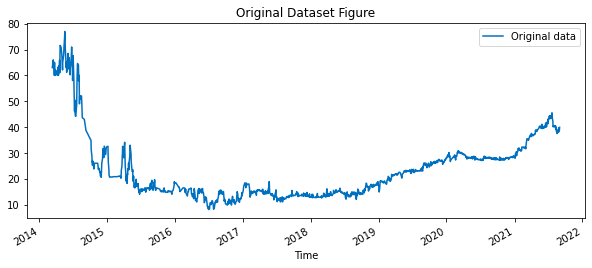

In [1]:
# 0.Introduction
#==============================================================================================
# This is a initialization module for a complete CEEMDAN-LSTM forecasting process.
# This is a module still testing. Some errors may occur during runtime.
# The following modules need to be installed before importing at Anaconda3.
# Otherwise, please install the corresponding modules by yourself according to the warnings.
# pip install EMD-signal
# pip install sampen
# pip install datetime
# pip install tensorflow-gpu==2.5.0
# pip install vmdpy

import CEEMDAN_LSTM as cl

# Declare the path
# The default dataset saving path: D:\\CEEMDAN_LSTM\\
# The default figures saving path: D:\\CEEMDAN_LSTM\\figures\\
# The default logs and output saving path: D:\\CEEMDAN_LSTM\\subset\\
# The default dataset name: cl_sample_dataset (must be csv file)

series = cl.declare_path() # use default path
# if you want to use anthor dataset, you can cl.declare_path(series=pd.Series)

# Import some common modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
PATH = 'D:\\CEEMDAN_LSTM\\'
F_PATH = 'D:\\CEEMDAN_LSTM\\figures\\'
L_PATH = 'D:\\CEEMDAN_LSTM\\subset\\'

# Contents
# 0. Initialization
# 1. Statistical Tests for Data
# 2. CEEMDAN Decomposition and Integration
# 3. LSTM Forecasting
# 4. Improvement and Comparison
# 5. Hybrid Forecasting

An example of cl.example() is running around 200 seconds.
##################################

(1) Declare a path for saving files:
-------------------------------
Saving path: D:\CEEMDAN_LSTM\
Load sample dataset: cl_sample_dataset.csv


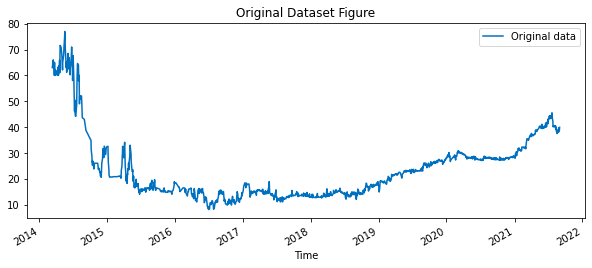


(2) CEEMDAN decompose:
-------------------------------
CEEMDAN decomposition is running.


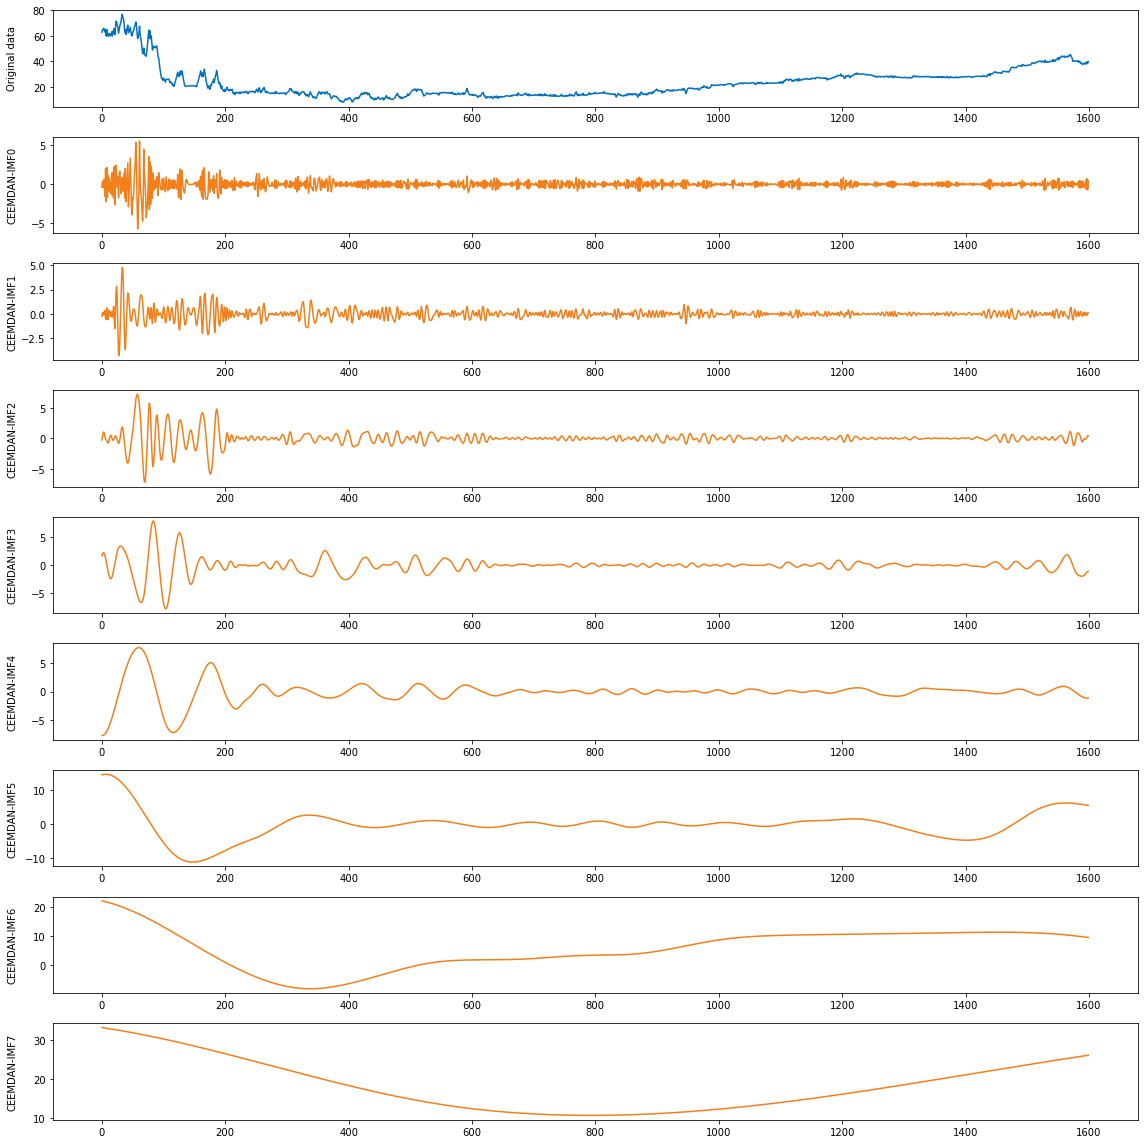

CEEMDAN finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_data.csv

(3) Sample Entropy:
-------------------------------
Sample entropy of CEEMDAN is running.


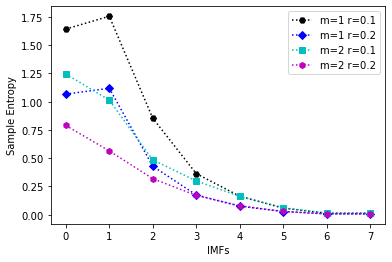


(4) Integrating IMFs:
-------------------------------
The Integrating Form: 233


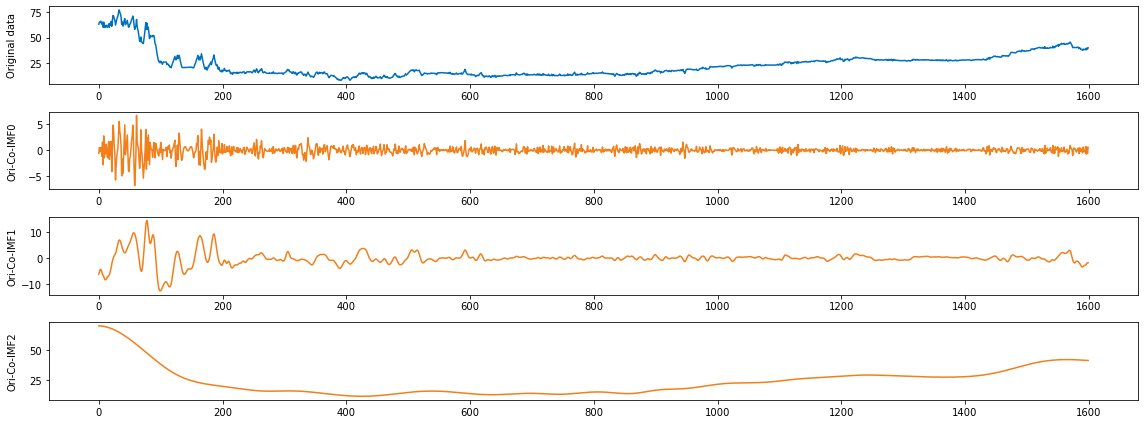

Integration finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_se233_data.csv

(5) Forecast:
-------------------------------
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
This is Hybrid LSTM Forecasting running...

Respective method result:
##################################
Model Evaluation with scale of input df
##################################
R2: 0.9352351856184741
RMSE: 0.5315502767871131
MAE: 0.43272016184000023
MAPE: 1.0738122380216255

Hybrid LSTM Forecasting is still running...

Input Shape: (31,3)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.9471115252319368
RMSE: 0.006971658179758917
MAE: 0.005713346748203264
MAPE: 1.220578944674942


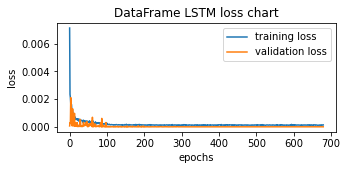

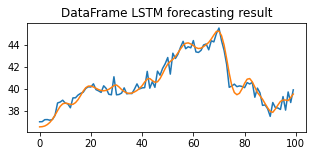

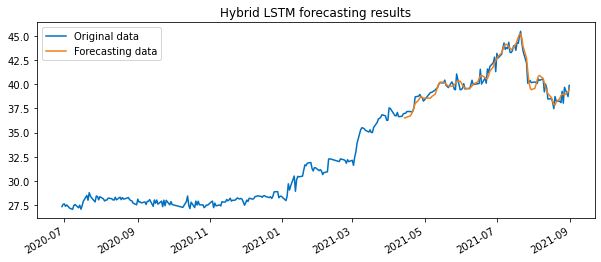

##################################
Model Evaluation with scale of input df
##################################
R2: 0.947111499271857
RMSE: 0.4803473664735627
MAE: 0.39364962310791024
MAPE: 0.9749956263553408
Running time: 1435.113s
Hybrid LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\hybrid_ceemdan_se233_log.csv


In [2]:
cl.run_example()

# 1. Statistical Tests for Data

##################################
ADF Test
##################################
Test value: -2.8969092510641294
P value: 0.04570859183276388
Lags: 17
1% confidence interval: -3.4344902922617484
5% confidence interval: -2.8633686930199795
10% confidence interval: -2.567743562326489
The p-value is 0.04570859183276388, so the series has strong stationarity.
The automatic selecting lags is 17, advising the past 17 days as the features.
##################################
Ljung-Box Test
##################################


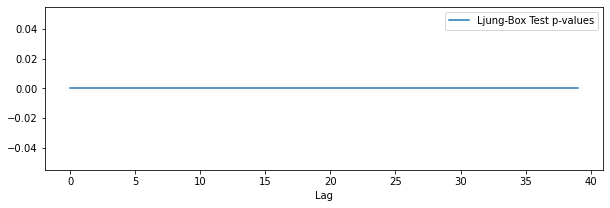

The sum of p-value is 0.0<=0.05, rejecting the null hypothesis that the series has very strong autocorrelation.
##################################
Jarque-Bera Test
##################################
Test value: 1509.3772792404036
P value: 0.0
Skewness: 1.727226791736255
Kurtosis: 6.272217845474226
p-value is 0.0<=0.05, rejecting the null hypothesis that the series has no normality.
##################################
ACF and PACF
##################################


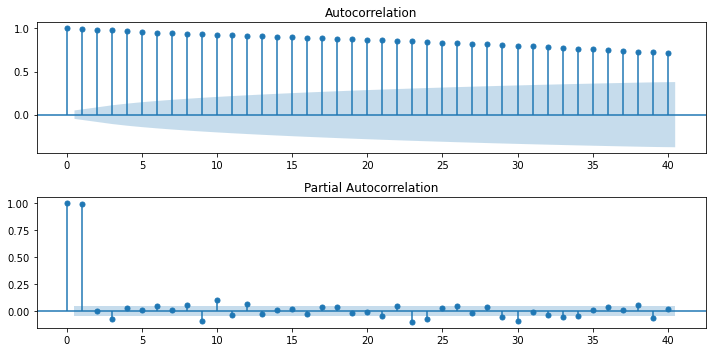

In [3]:
# Statistical Tests
# ADF test; Ljung-Box Test; Jarque-Bera Test; Plot ACF and PACF figures
cl.statistical_tests()

# 2. CEEMDAN Decomposition and Integration

CEEMDAN decomposition is running.


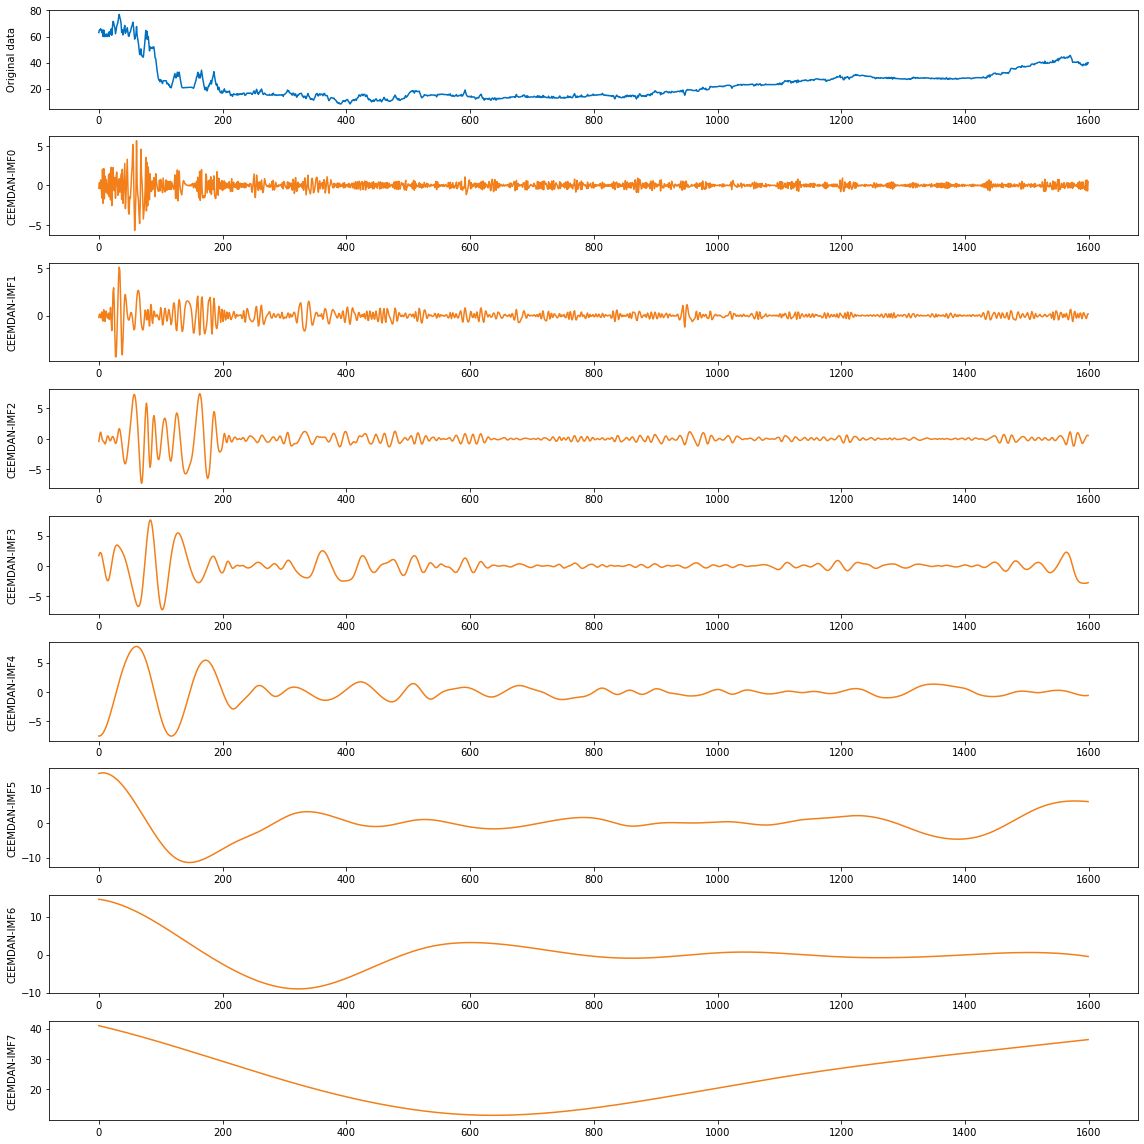

In [4]:
# CEEMDAN and its SE
cl.declare_vars(mode='ceemdan')
imfs = cl.emd_decom() # CEEMDAN 

Sample entropy of CEEMDAN is running.


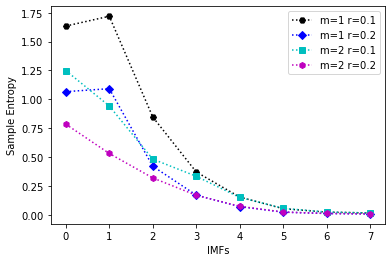

In [2]:
cl.sample_entropy() # SE

##################################
Global Variables
##################################
MODE:EMD
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
EMD decomposition is running.


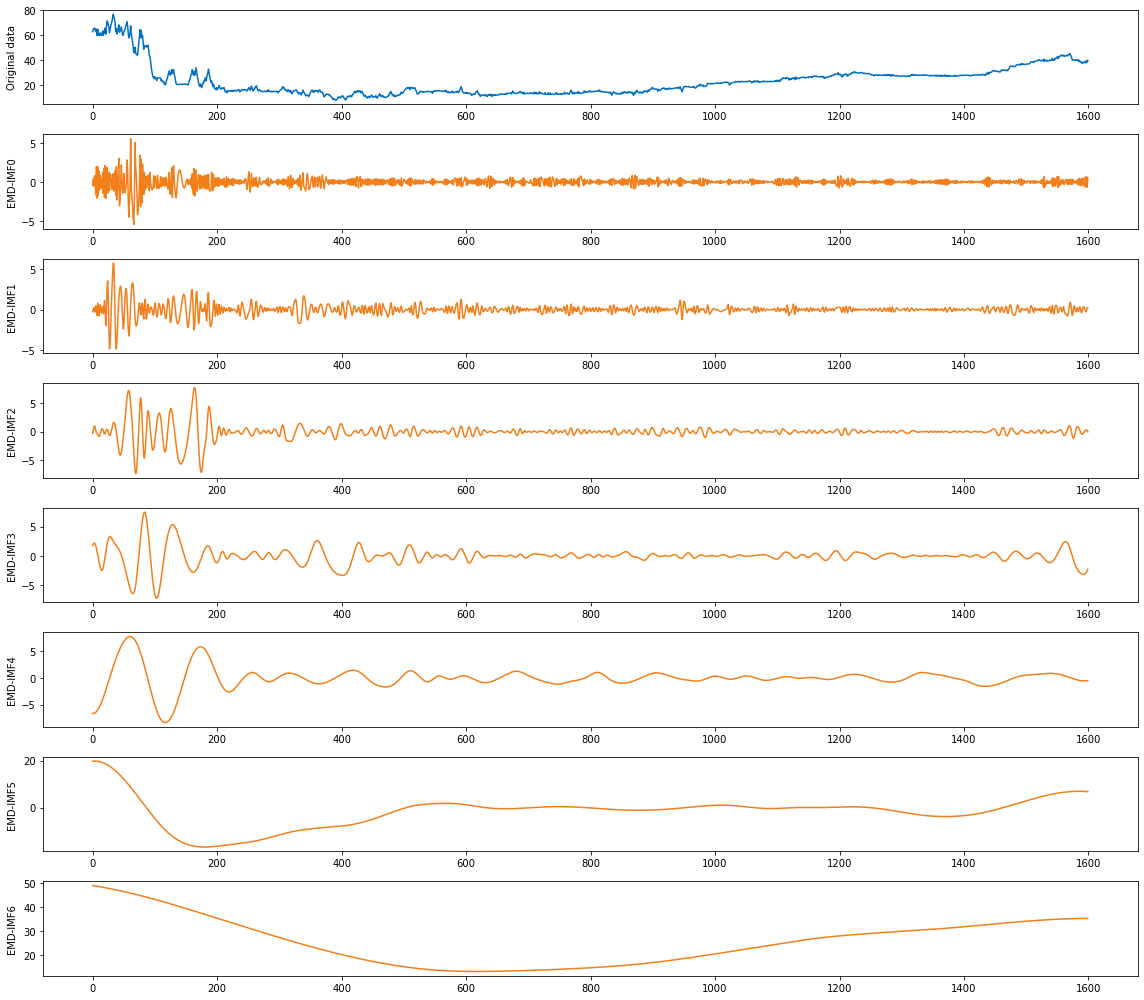

Sample entropy of EMD is running.


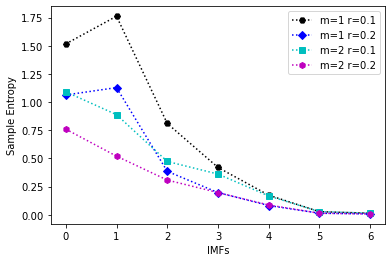

In [5]:
# EMD and its SE
cl.declare_vars(mode='emd')
imfs_emd = cl.emd_decom()
cl.sample_entropy() # SE

##################################
Global Variables
##################################
MODE:EEMD
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
EEMD decomposition is running.


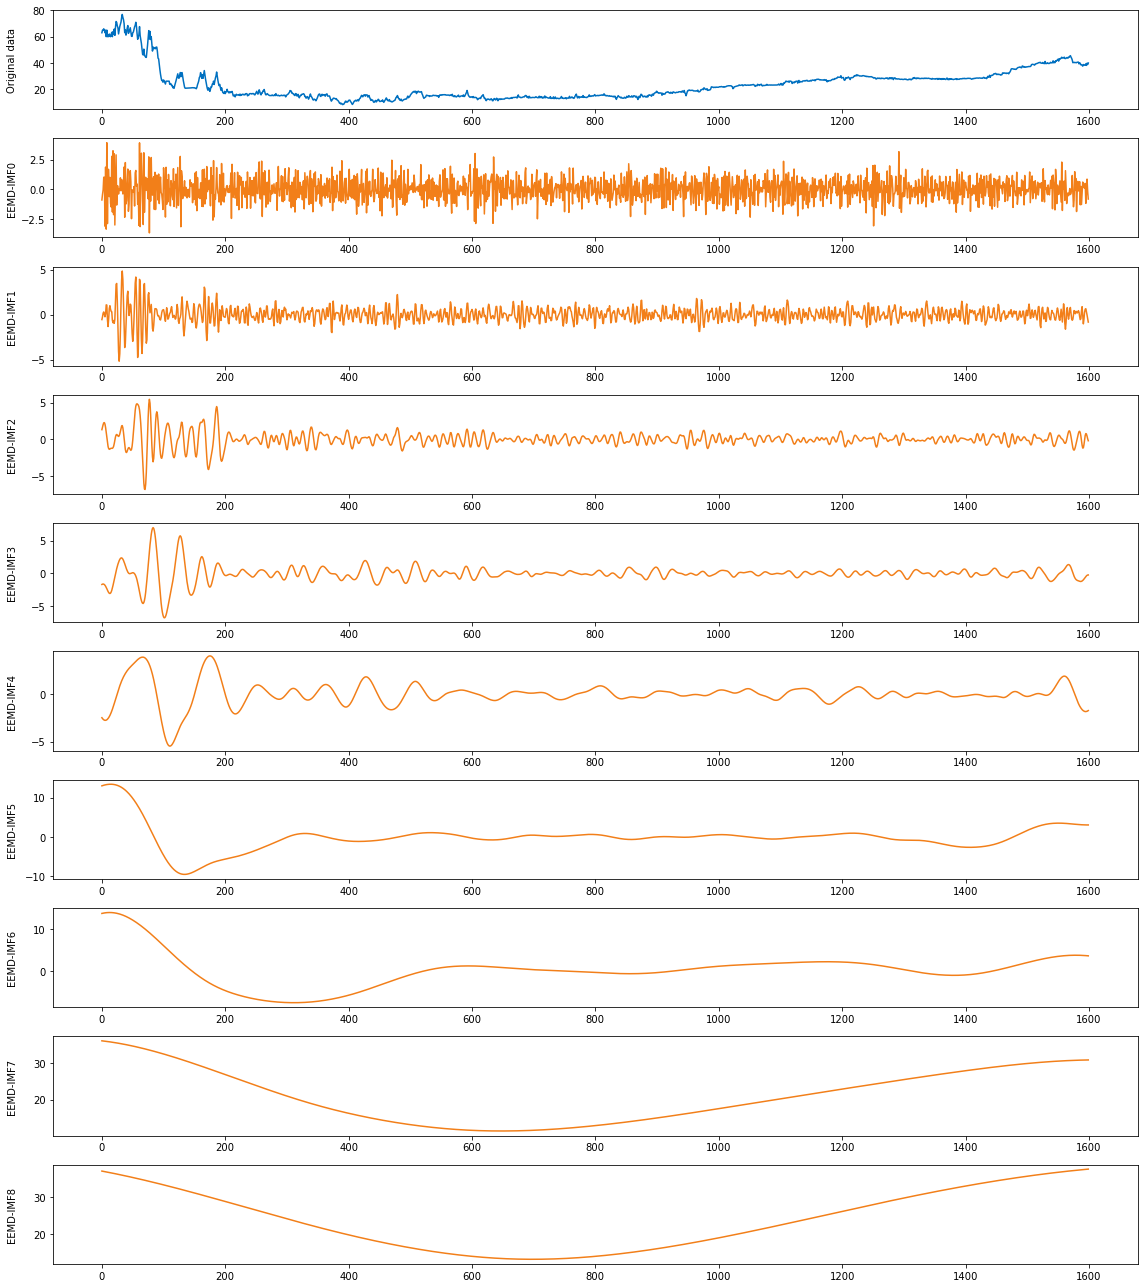

Sample entropy of EEMD is running.


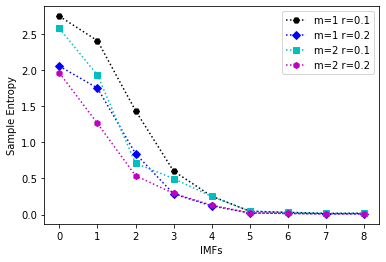

In [6]:
# EEMD and its SE
cl.declare_vars(mode='eemd')
imfs_eemd = cl.emd_decom()
cl.sample_entropy() # SE

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
The Integrating Form: 233


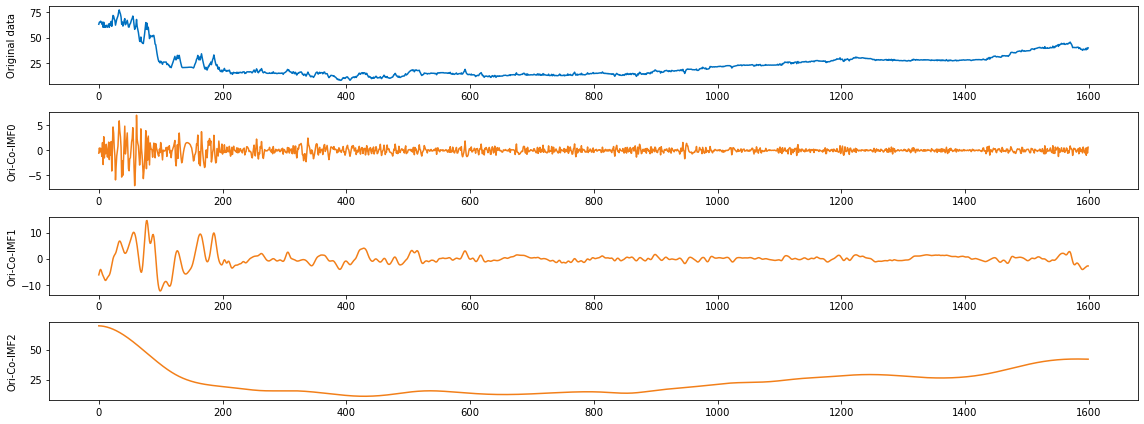

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se233_data.csv


In [4]:
# Integrate IMFs of CEEMDAN by SE
# declare agian if change to EMD or EEMD before
cl.declare_vars(mode='ceemdan') # CEEMDAN 
form = [[0,1],[2,3,4],[5,6,7]] # form 233
cl.integrate(inte_form=form) 

# 3. LSTM Forecasting

## 3.1. Single LSTM Forecasting without CEEMDAN

##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:1
SHUFFLE:True
PATIENCE:100
##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:1000
This is Single LSTM Forecasting without CEEMDAN running...
Part of Inputting dataset:
date
2014-03-14    63.00
2014-03-17    65.00
2014-03-18    65.00
2014-03-19    66.00
2014-03-20    65.00
              ...  
2021-08-25    39.28
2021-08-26    38.05
2021-08-27    39.70
2021-08-30    38.74
2021-08-31    39.89
Length: 1600, dtype: float64

Input Shape:
(30,1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           66560     
_________________________________________________________________
dro

83/83 [==============================] - 1s 8ms/step - loss: 6.2363e-04 - val_loss: 1.5714e-04
Epoch 58/1000
83/83 [==============================] - 1s 8ms/step - loss: 5.3928e-04 - val_loss: 9.4980e-05
Epoch 59/1000
83/83 [==============================] - 1s 8ms/step - loss: 6.2964e-04 - val_loss: 2.1451e-04
Epoch 60/1000
83/83 [==============================] - 1s 8ms/step - loss: 5.8392e-04 - val_loss: 1.7574e-04
Epoch 61/1000
83/83 [==============================] - 1s 8ms/step - loss: 5.5805e-04 - val_loss: 6.2630e-05
Epoch 62/1000
83/83 [==============================] - 1s 8ms/step - loss: 6.7045e-04 - val_loss: 4.0078e-04
Epoch 63/1000
83/83 [==============================] - 1s 8ms/step - loss: 5.4754e-04 - val_loss: 6.9456e-05
Epoch 64/1000
83/83 [==============================] - 1s 8ms/step - loss: 5.9775e-04 - val_loss: 2.7875e-04
Epoch 65/1000
83/83 [==============================] - 1s 8ms/step - loss: 6.0786e-04 - val_loss: 1.3462e-04
Epoch 66/1000
83/83 [============

83/83 [==============================] - 1s 15ms/step - loss: 4.3581e-04 - val_loss: 5.3702e-05
Epoch 206/1000
83/83 [==============================] - 1s 15ms/step - loss: 4.4287e-04 - val_loss: 6.2455e-05
Epoch 207/1000
83/83 [==============================] - 1s 14ms/step - loss: 3.8572e-04 - val_loss: 5.6954e-05
Epoch 208/1000
83/83 [==============================] - 1s 14ms/step - loss: 4.0015e-04 - val_loss: 4.5269e-05
Epoch 209/1000
83/83 [==============================] - 1s 14ms/step - loss: 3.9479e-04 - val_loss: 4.6550e-05
Epoch 210/1000
83/83 [==============================] - 1s 15ms/step - loss: 4.6185e-04 - val_loss: 4.7807e-05
Epoch 211/1000
83/83 [==============================] - 1s 14ms/step - loss: 4.3315e-04 - val_loss: 1.0186e-04
Epoch 212/1000
83/83 [==============================] - 1s 14ms/step - loss: 4.2637e-04 - val_loss: 4.8850e-05
Epoch 213/1000
83/83 [==============================] - 1s 11ms/step - loss: 3.4484e-04 - val_loss: 4.3641e-05
Epoch 214/1000
8

83/83 [==============================] - 1s 10ms/step - loss: 3.7948e-04 - val_loss: 4.9529e-05
Epoch 352/1000
83/83 [==============================] - 1s 11ms/step - loss: 4.0819e-04 - val_loss: 4.9305e-05
Epoch 353/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.8779e-04 - val_loss: 4.8893e-05
Epoch 354/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.4931e-04 - val_loss: 4.9140e-05
Epoch 355/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.4304e-04 - val_loss: 4.9154e-05
Epoch 356/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.9131e-04 - val_loss: 4.8994e-05
Epoch 357/1000
83/83 [==============================] - 1s 11ms/step - loss: 4.0078e-04 - val_loss: 4.9671e-05
Epoch 358/1000
83/83 [==============================] - 1s 11ms/step - loss: 4.2417e-04 - val_loss: 4.9383e-05
Epoch 359/1000
83/83 [==============================] - 1s 11ms/step - loss: 4.2490e-04 - val_loss: 4.8987e-05
Epoch 360/1000
8

Epoch 498/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.8045e-04 - val_loss: 4.9717e-05
Epoch 499/1000
83/83 [==============================] - 1s 10ms/step - loss: 4.0756e-04 - val_loss: 4.9701e-05
Epoch 500/1000
83/83 [==============================] - 1s 10ms/step - loss: 4.1939e-04 - val_loss: 4.9716e-05
Epoch 501/1000
83/83 [==============================] - 1s 11ms/step - loss: 4.1131e-04 - val_loss: 4.9740e-05
Epoch 502/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.8771e-04 - val_loss: 4.9656e-05
Epoch 503/1000
83/83 [==============================] - 1s 10ms/step - loss: 4.0006e-04 - val_loss: 4.9678e-05
Epoch 504/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.8982e-04 - val_loss: 4.9704e-05
Epoch 505/1000
83/83 [==============================] - 1s 10ms/step - loss: 3.6208e-04 - val_loss: 4.9629e-05
Epoch 506/1000
83/83 [==============================] - 1s 11ms/step - loss: 3.9776e-04 - val_loss: 4.9614e-05
E

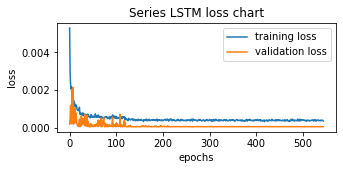

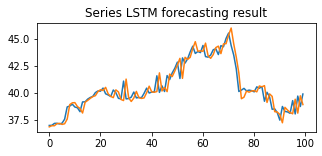

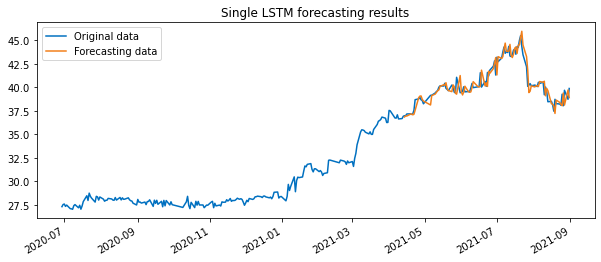

##################################
Model Evaluation with scale of input series
##################################
R2: 0.86774641860799
RMSE: 0.759588719993299
MAE: 0.53869822845459
MAPE: 1.3247112888157377
Running time: 454.609s


In [3]:
# CEEMDAN-LSTM: Single LSTM method
# Input Shape: (DATE_BACK, the number of features)
cl.declare_vars(epochs=1000)
cl.Single_LSTM()

## 3.2. Ensemble LSTM Forecasting

##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:1
SHUFFLE:True
PATIENCE:100
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:1000
This is Ensemble LSTM Forecasting running...
Part of Inputting dataset:
       co-imf0   co-imf1    co-imf2  close
0    -0.588608 -6.344388  69.932997  63.00
1     0.505108 -5.412853  69.907746  65.00
2    -0.199983 -4.672321  69.872304  65.00
3     0.603817 -4.430475  69.826658  66.00
4     0.046897 -4.817802  69.770905  65.00
...        ...       ...        ...    ...
1595  0.653796 -3.398053  42.024256  39.28
1596 -0.795841 -3.175747  42.021588  38.05
1597  0.550913 -2.869655  42.018742  39.70
1598 -0.628012 -2.647696  42.015708  38.74
1599  0.529326 -2.651796  42.012470  39.89

[1600 rows x 4 columns]

Input Shape:
(30,3)

Model: "sequen

83/83 [==============================] - 1s 11ms/step - loss: 2.3505e-04 - val_loss: 3.2989e-05
Epoch 127/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.4869e-04 - val_loss: 2.6217e-05
Epoch 128/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.4122e-04 - val_loss: 2.1522e-05
Epoch 129/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.2709e-04 - val_loss: 2.2370e-05
Epoch 130/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.4140e-04 - val_loss: 1.9129e-05
Epoch 131/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.5199e-04 - val_loss: 2.9184e-05
Epoch 132/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.5428e-04 - val_loss: 8.3840e-05
Epoch 133/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.3249e-04 - val_loss: 1.8865e-05
Epoch 134/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.1052e-04 - val_loss: 1.8774e-05
Epoch 135/1000
8

Epoch 200/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.5383e-04 - val_loss: 2.5415e-05
Epoch 201/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.1180e-04 - val_loss: 2.2852e-05
Epoch 202/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.5058e-04 - val_loss: 6.2621e-05
Epoch 203/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.0640e-04 - val_loss: 1.8845e-05
Epoch 204/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.1774e-04 - val_loss: 2.1301e-05

Epoch 00204: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 205/1000
83/83 [==============================] - 1s 12ms/step - loss: 2.4288e-04 - val_loss: 2.2076e-05
Epoch 206/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.3323e-04 - val_loss: 2.4808e-05
Epoch 207/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.2888e-04 - val_loss: 2.2778e-05
Epoch 208/1000
83/83 [========

83/83 [==============================] - 1s 11ms/step - loss: 2.2705e-04 - val_loss: 2.0192e-05
Epoch 274/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.4278e-04 - val_loss: 2.2480e-05
Epoch 275/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.3100e-04 - val_loss: 2.5971e-05
Epoch 276/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.1799e-04 - val_loss: 2.4743e-05
Epoch 277/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.5519e-04 - val_loss: 2.6353e-05
Epoch 278/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.2206e-04 - val_loss: 1.9930e-05
Epoch 279/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.0088e-04 - val_loss: 2.3281e-05
Epoch 280/1000
83/83 [==============================] - 1s 11ms/step - loss: 2.4426e-04 - val_loss: 1.8968e-05
Epoch 281/1000
83/83 [==============================] - 1s 11ms/step - loss: 1.8856e-04 - val_loss: 2.7519e-05
Epoch 282/1000
8

Epoch 420/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.1829e-04 - val_loss: 2.2307e-05
Epoch 421/1000
83/83 [==============================] - 1s 9ms/step - loss: 2.2025e-04 - val_loss: 2.2301e-05
Epoch 422/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.1148e-04 - val_loss: 2.2298e-05
Epoch 423/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.7074e-04 - val_loss: 2.2225e-05
Epoch 424/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.0914e-04 - val_loss: 2.2170e-05
Epoch 425/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.2418e-04 - val_loss: 2.2018e-05
Epoch 426/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.4144e-04 - val_loss: 2.1904e-05
Epoch 427/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.4082e-04 - val_loss: 2.1874e-05
Epoch 428/1000
83/83 [==============================] - 1s 9ms/step - loss: 2.1137e-04 - val_loss: 2.1867e-05
Epoch 429/

Epoch 568/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.2247e-04 - val_loss: 2.1422e-05
Epoch 569/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.4164e-04 - val_loss: 2.1427e-05
Epoch 570/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.0390e-04 - val_loss: 2.1425e-05
Epoch 571/1000
83/83 [==============================] - 1s 9ms/step - loss: 2.1553e-04 - val_loss: 2.1430e-05
Epoch 572/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.3768e-04 - val_loss: 2.1431e-05
Epoch 573/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.2133e-04 - val_loss: 2.1431e-05
Epoch 574/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.2368e-04 - val_loss: 2.1428e-05
Epoch 575/1000
83/83 [==============================] - 1s 9ms/step - loss: 2.2110e-04 - val_loss: 2.1427e-05
Epoch 576/1000
83/83 [==============================] - 1s 8ms/step - loss: 2.0470e-04 - val_loss: 2.1428e-05
Epoch 577/

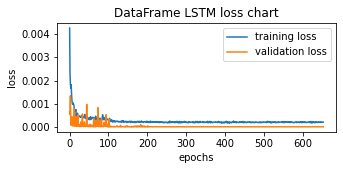

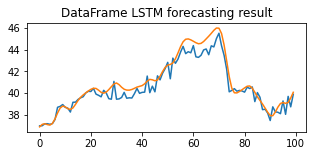

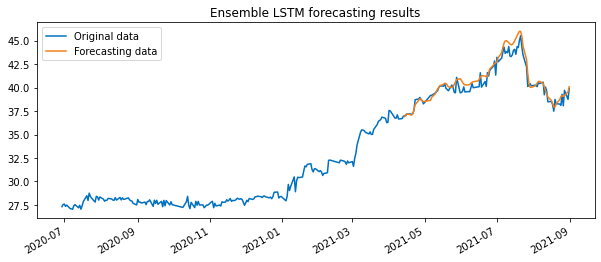

##################################
Model Evaluation with scale of input df
##################################
R2: 0.8923631988826658
RMSE: 0.6852596770529088
MAE: 0.5291400909423829
MAPE: 1.2863793362680116
Running time: 528.783s


In [4]:
# CEEMDAN-LSTM: Ensemble LSTM method with form 233
# the varibales not delcared will change to the default
cl.declare_vars(mode='ceemdan_se',form='233',epochs=1000) # CEEMDAN 
cl.Ensemble_LSTM() # need ceemdan_se233_data.csv

## 3.3. Respective LSTM Forecasting

##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:1000
This is Respective LSTM Forecasting running...
Part of Inputting dataset:
       co-imf0   co-imf1    co-imf2
0    -0.588608 -6.344388  69.932997
1     0.505108 -5.412853  69.907746
2    -0.199983 -4.672321  69.872304
3     0.603817 -4.430475  69.826658
4     0.046897 -4.817802  69.770905
...        ...       ...        ...
1595  0.653796 -3.398053  42.024256
1596 -0.795841 -3.175747  42.021588
1597  0.550913 -2.869655  42.018742
1598 -0.628012 -2.647696  42.015708
1599  0.529326 -2.651796  42.012470

[1600 rows x 3 columns]
CEEMDAN_SE--IMF0

Input Shape:
(30,1)

Model: "sequential_2"
_________________________________________________________

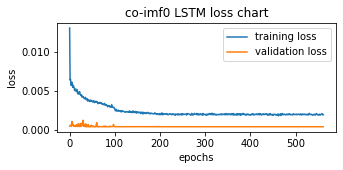

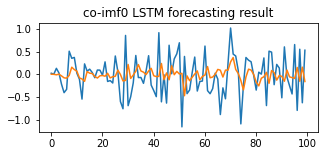

CEEMDAN_SE--IMF1

Input Shape:
(30,1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 128)           66560     
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)

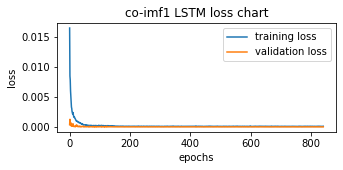

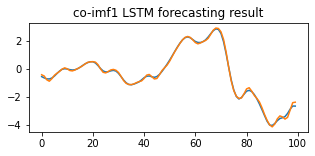

CEEMDAN_SE--IMF2

Input Shape:
(30,1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 128)           66560     
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 64)            49408     
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)

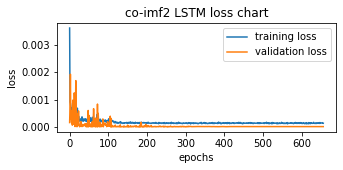

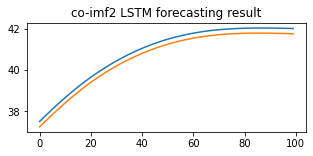

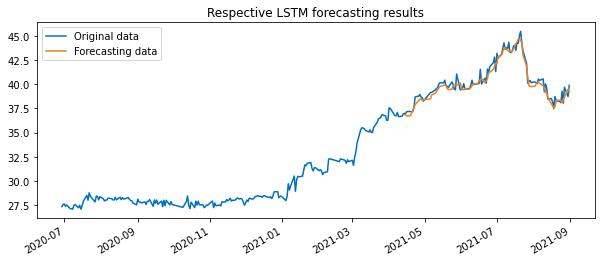

##################################
Model Evaluation with scale of input df
##################################
R2: 0.9404792448369351
RMSE: 0.5095760433588628
MAE: 0.4057859802246094
MAPE: 0.9996693913288321
Running time: 1400.877s


In [5]:
# CEEMDAN-LSTM: Respective LSTM method with form 233
# the varibales not delcared will change to the default
cl.declare_vars(mode='ceemdan_se',form='233',epochs=1000) 
cl.Respective_LSTM()# nedd ceemdan_se233_data.csv

In [48]:
# Normalized Integration
df_res = pd.read_csv(PATH+'subset\\respective_ceemdan_se233_pred.csv',header=0,index_col=0)
res_pred = df_res.T.sum().values
rate = series.max()-series.min()
series_nor = (series-series.min())/float(rate)
res_pred = (res_pred-series.min())/float(rate)
df_evl = cl.evl(series_nor[-100:].values,res_pred,scale='carbon prices') 

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9404792397683426
RMSE: 0.007395879028385708
MAE: 0.005889491398358497
MAPE: 1.249744572682916


## 3.4. Compare above CEEMDAN-LSTM methods

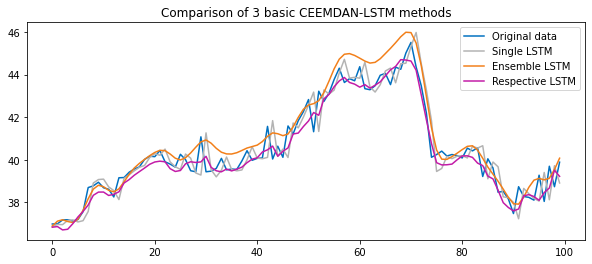

In [49]:
# Plot comparison chart of the above three methods
df_sin = pd.read_csv(L_PATH+'single_pred.csv',header=0,index_col=0)
df_ens = pd.read_csv(L_PATH+'ensemble_ceemdan_se233_pred.csv',header=0,index_col=0)
df_res = pd.read_csv(L_PATH+'respective_ceemdan_se233_pred.csv',header=0,index_col=0)
df_res = df_res.T.sum().values

# Plot original data by series
PERIODS = 100 # 
length = range(PERIODS)
fig = plt.figure(figsize=(10,4))
plt.plot(length, series[-PERIODS:], label= 'Original data', color='#0070C0') #F27F19 orange #0070C0 blue
plt.plot(length, df_sin, label= 'Single LSTM', color='0.7') 
plt.plot(length, df_ens, label= 'Ensemble LSTM', color='#F27F19') 
plt.plot(length, df_res, label= 'Respective LSTM', color='#C31BA7') #C31BA7 pink
plt.xlabel('')
plt.legend()
plt.title('Comparison of 3 basic CEEMDAN-LSTM methods')
plt.savefig(F_PATH+'Comparison of 3 basic CEEMDAN-LSTM methods.svg', bbox_inches='tight')
plt.show()

# 4. Improvement and Comparison

## 4.1. Re-integration

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
The Integrating Form: 44


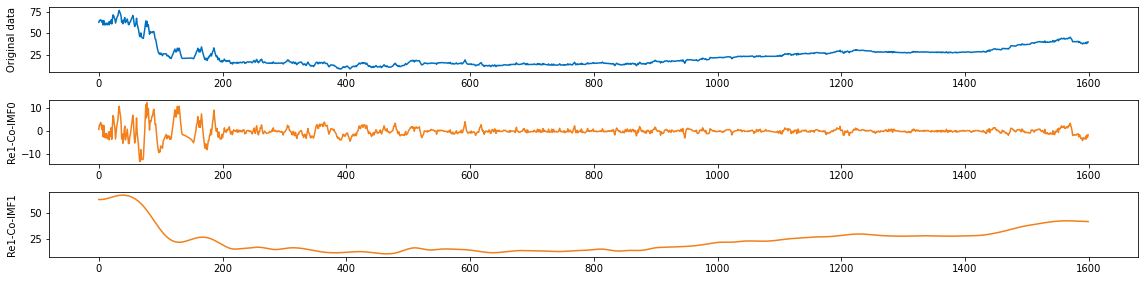

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se44_data.csv
The Integrating Form: 323


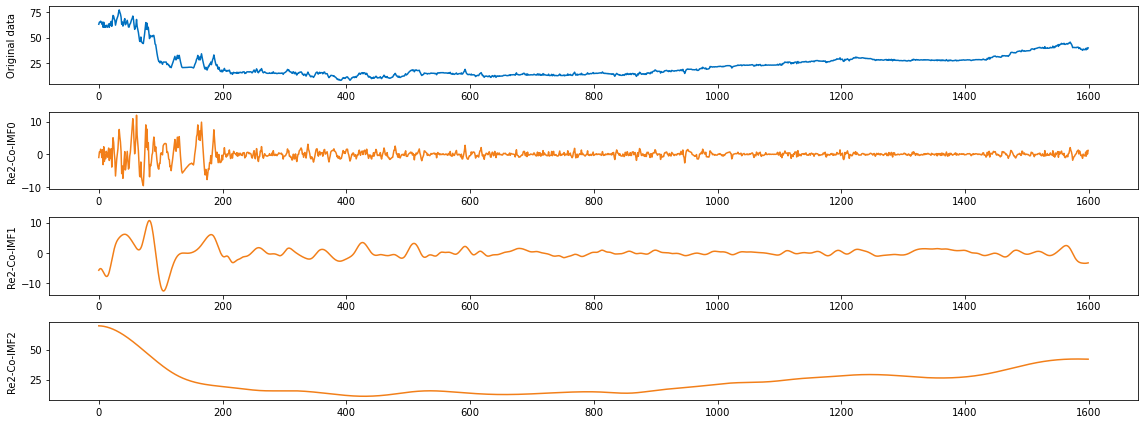

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se323_data.csv
The Integrating Form: 224


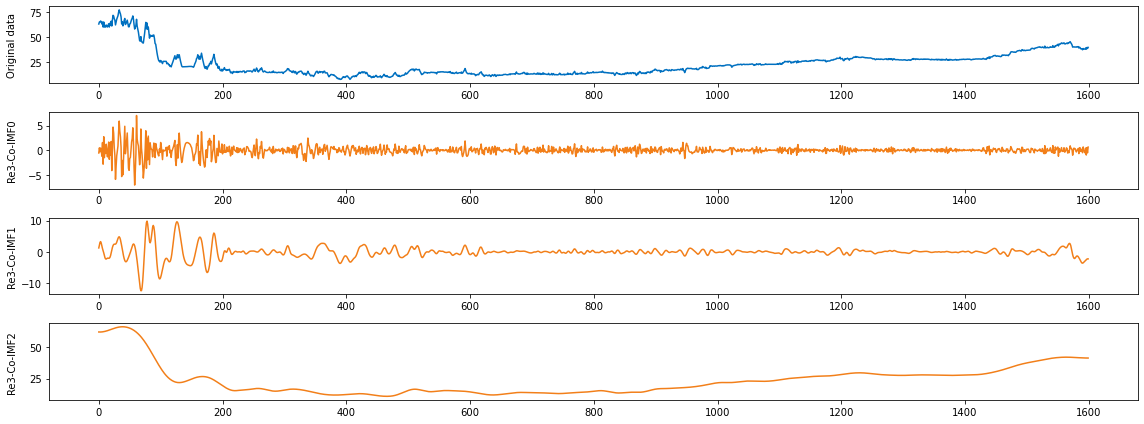

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se224_data.csv
The Integrating Form: 2222


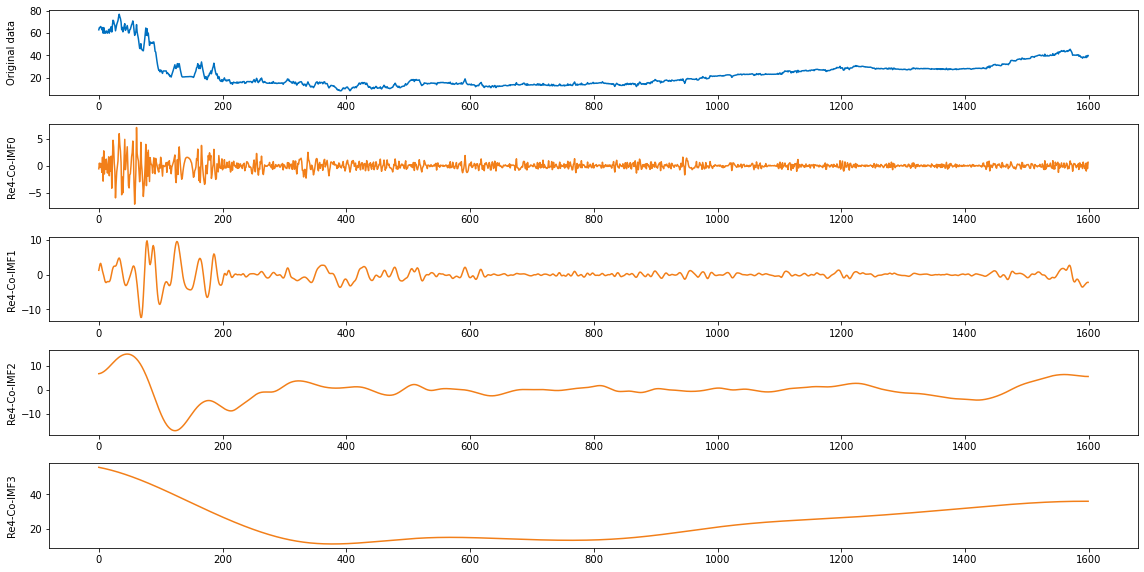

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se2222_data.csv
The Integrating Form: 2123


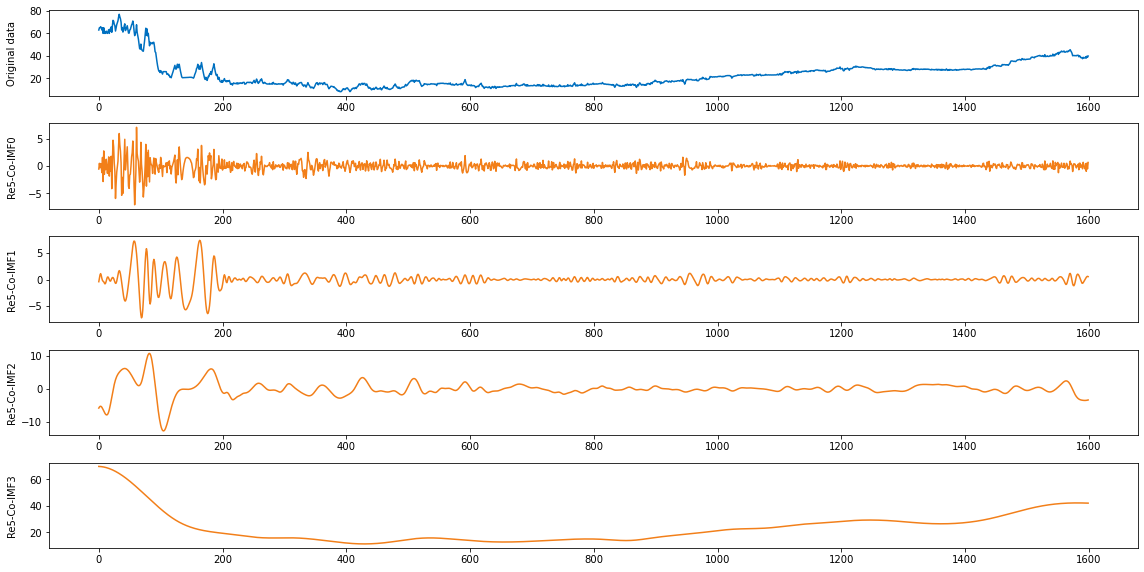

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se2123_data.csv
The Integrating Form: 1133


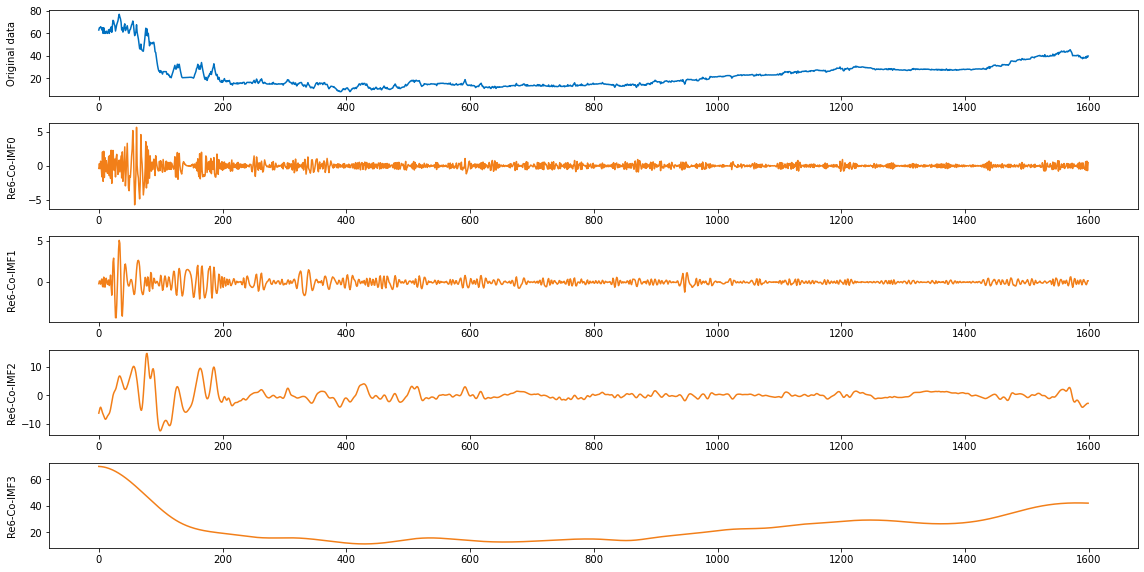

Integration dataset saves: D:\CEEMDAN_LSTM\ceemdan_se1133_data.csv


In [3]:
# Integrate IMFs of CEEMDAN by SE
cl.declare_vars(mode='ceemdan') # CEEMDAN 
form = [[0,1,2,3],[4,5,6,7]] # Re1 = 44
cl.integrate(inte_form=form)
form = [[0,1,2],[3,4],[5,6,7]] # Re2 = 323
cl.integrate(inte_form=form)
form = [[0,1],[2,3],[4,5,6,7]] # Re3 = 224
cl.integrate(inte_form=form)
form = [[0,1],[2,3],[4,5],[6,7]] # Re4 = 2222
cl.integrate(inte_form=form)
form = [[0,1],[2],[3,4],[5,6,7]] # Re5 = 2123
cl.integrate(inte_form=form)
form = [[0],[1],[2,3,4],[5,6,7]] # Re6 = 1133
cl.integrate(inte_form=form)

In [3]:
# CEEMDAN-SE233
cl.declare_vars(mode='ceemdan_se',form='233',epochs=100)
# also run Single method
cl.Multi_pred(run_times=25,single_lstm=True,ensemble_lstm=True,respective_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 6380.815s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [4]:
# CEEMDAN-SE44
cl.declare_vars(mode='ceemdan_se',form='44',epochs=100)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:44
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE44 is running...
Multiple predictions completed, taking 3498.716s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [5]:
# CEEMDAN-SE323
cl.declare_vars(mode='ceemdan_se',form='323',epochs=100)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:323
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE323 is running...
Multiple predictions completed, taking 5123.466s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [6]:
# CEEMDAN-SE224
cl.declare_vars(mode='ceemdan_se',form='224',epochs=100)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:224
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE224 is running...
Multiple predictions completed, taking 4901.492s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [7]:
# CEEMDAN-SE2222
cl.declare_vars(mode='ceemdan_se',form='2222',epochs=100)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2222
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE2222 is running...
Multiple predictions completed, taking 6049.809s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [8]:
# CEEMDAN-SE2123
cl.declare_vars(mode='ceemdan_se',form='2123',epochs=100)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2123
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE2123 is running...
Multiple predictions completed, taking 6281.516s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [9]:
# CEEMDAN-SE1133
cl.declare_vars(mode='ceemdan_se',form='1133',epochs=100)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:1133
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE1133 is running...
Multiple predictions completed, taking 6655.755s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


In [10]:
# CEEMDAN
cl.declare_vars(mode='ceemdan') # default epochs=100
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 11672.473s
Please check the logs in:
D:\CEEMDAN_LSTM\subset\


## 4.2. Same time level

In [6]:
# CEEMDAN-SE233
cl.declare_vars(mode='ceemdan_se',form='233',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 4114.920s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [7]:
# CEEMDAN-SE44
cl.declare_vars(mode='ceemdan_se',form='44',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:44
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE44 is running...
Multiple predictions completed, taking 3247.967s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [8]:
# CEEMDAN-SE323
cl.declare_vars(mode='ceemdan_se',form='323',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:323
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE323 is running...
Multiple predictions completed, taking 3620.500s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [9]:
# CEEMDAN-SE224
cl.declare_vars(mode='ceemdan_se',form='224',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:224
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE224 is running...
Multiple predictions completed, taking 3430.639s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [10]:
# CEEMDAN-SE2222
cl.declare_vars(mode='ceemdan_se',form='2222',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2222
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE2222 is running...
Multiple predictions completed, taking 3163.013s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [11]:
# CEEMDAN-SE2123
cl.declare_vars(mode='ceemdan_se',form='2123',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2123
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE2123 is running...
Multiple predictions completed, taking 3294.978s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [12]:
# CEEMDAN-SE1133
cl.declare_vars(mode='ceemdan_se',form='1133',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:1133
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN_SE1133 is running...
Multiple predictions completed, taking 3865.320s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [13]:
# CEEMDAN
cl.declare_vars(mode='ceemdan',epochs=300)
cl.Multi_pred(run_times=25,ensemble_lstm=True) 

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:300
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 3181.892s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


## 4.3. No integration

##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:1000
This is Ensemble LSTM Forecasting running...
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4       imf5       imf6  \
0    -0.359335 -0.229274 -0.217522  1.628739 -7.755605  13.739888  15.470065   
1     0.301536  0.203572  0.401021  1.944434 -7.758308  13.787643  15.450857   
2    -0.370368  0.170385  0.938181  2.122090 -7.732592  13.826599  15.430433   
3     0.623651 -0.019834  1.111469  2.135560 -7.677504  13.856743  15.408793   
4    -0.280327  0.327224  0.805718  1.969044 -7.592564  13.878172  15.385935   
...        ...       ...       ...       ...       ...        ...        ...   
1595  0.567962  0

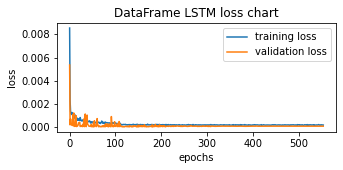

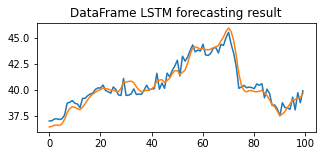

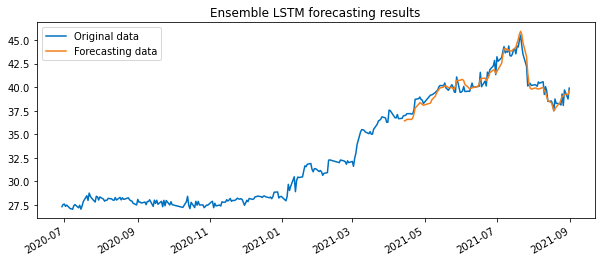

##################################
Model Evaluation with scale of input df
##################################
R2: 0.9189855294006452
RMSE: 0.5945057853410106
MAE: 0.49305312652587924
MAPE: 1.2176197476570547
Running time: 357.237s
Ensemble LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\ensemble_ceemdan_log.csv


In [16]:
# Ensemble method with 8 IMFs
cl.declare_vars(mode='ceemdan',epochs=1000) 
cl.Ensemble_LSTM(show_model=False)

This is Respective LSTM Forecasting running...
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4       imf5       imf6  \
0    -0.359335 -0.229274 -0.217522  1.628739 -7.755605  13.739888  15.470065   
1     0.301536  0.203572  0.401021  1.944434 -7.758308  13.787643  15.450857   
2    -0.370368  0.170385  0.938181  2.122090 -7.732592  13.826599  15.430433   
3     0.623651 -0.019834  1.111469  2.135560 -7.677504  13.856743  15.408793   
4    -0.280327  0.327224  0.805718  1.969044 -7.592564  13.878172  15.385935   
...        ...       ...       ...       ...       ...        ...        ...   
1595  0.567962  0.085835 -0.048996 -2.530546 -0.818511   0.020653   6.431700   
1596 -0.640582 -0.155259  0.092495 -2.455234 -0.813008   0.020218   6.427147   
1597  0.685345 -0.134432  0.310807 -2.377157 -0.803305   0.021041   6.421384   
1598 -0.699218  0.071206  0.443470 -2.301566 -0.789600   0.023103   6.414419   
1599  0.456359  0.072967  0.352140 -2.231850 -

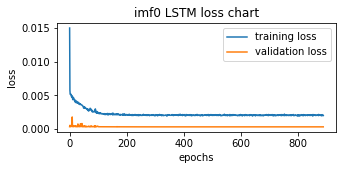

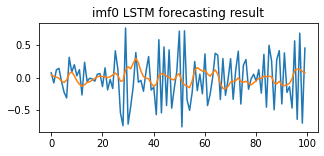

CEEMDAN--IMF1

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.7273607150955651
RMSE: 0.01466829047642242
MAE: 0.011936642467584914
MAPE: 2.6009825279735783


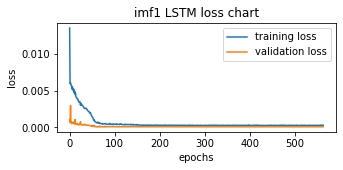

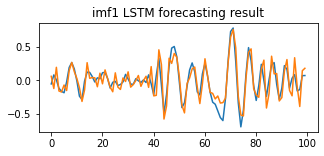

CEEMDAN--IMF2

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.9842077921616056
RMSE: 0.003661127705947148
MAE: 0.002636040919273084
MAPE: 0.5466675456993342


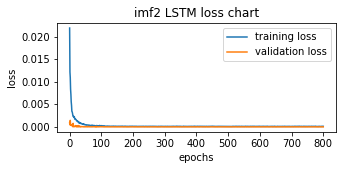

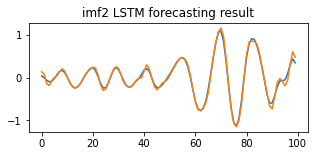

CEEMDAN--IMF3

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.9991613543659489
RMSE: 0.002724810096033269
MAE: 0.0022195485403819874
MAPE: 0.5266914737594759


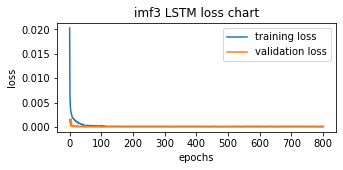

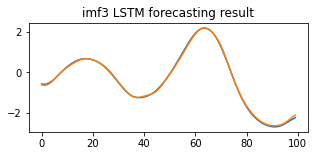

CEEMDAN--IMF4

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.9993948987060708
RMSE: 0.000722831156290043
MAE: 0.0005954855930148866
MAPE: 0.1198843652229035


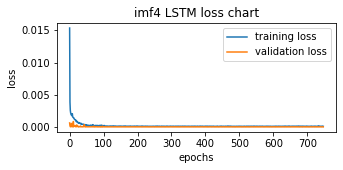

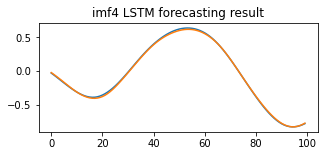

CEEMDAN--IMF5

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.9988480945349718
RMSE: 0.0005622253531734785
MAE: 0.00041530127359867554
MAPE: 0.09023538872324105


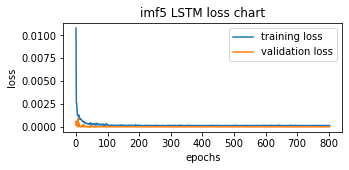

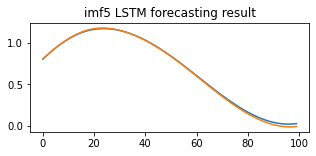

CEEMDAN--IMF6

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.9946500224881171
RMSE: 0.004020680971667481
MAE: 0.003885516123700346
MAPE: 0.6797701858625316


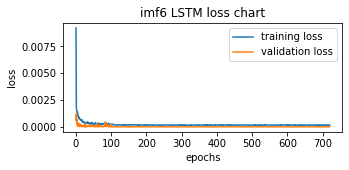

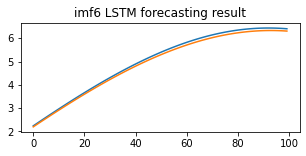

CEEMDAN--IMF7

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: -0.08592314321543815
RMSE: 0.012617172021618094
MAE: 0.01261331284250899
MAPE: 1.5777212188531342


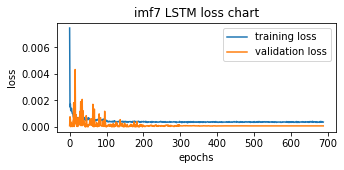

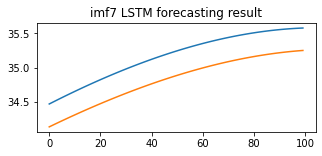

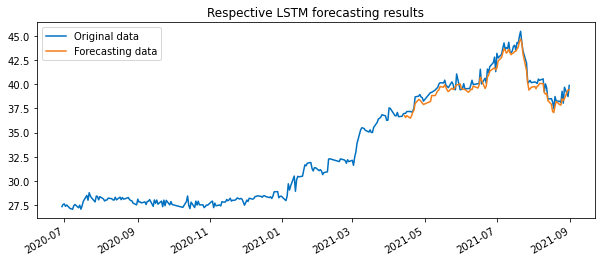

##################################
Model Evaluation with scale of input df
##################################
R2: 0.9258748944175321
RMSE: 0.5686662429786952
MAE: 0.4862980438232423
MAPE: 1.1998581525167746
Running time: 3863.498s
Respective LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\respective_ceemdan_log.csv


In [17]:
# Respective method with 8 IMFs
cl.Respective_LSTM(show_model=False)

## 4.4. Substitution of high-frequency sequence

In [19]:
# IMF0 improving forecast
df_emd = pd.read_csv(PATH+'ceemdan_data.csv',header=0,index_col=0)
df_price = pd.read_csv(L_PATH+'respective_ceemdan_pred.csv',header=0,index_col=0)
series_test = df_emd['imf0'][-100:]
mean_1500 = df_emd['imf0'][:-100].mean()

# original
print('original')
evl_wn = cl.evl(series_test,df_price['imf0'])

# white noise
np.random.seed(345)
series_wn = pd.Series(np.random.randn(100))
print('\nWhite noise')
evl_wn = cl.evl(series_test,series_wn)

# All-average series
print('\nAll-average series')
series_mean = pd.Series([mean_1500 for x in range(100)]) # all-average series
evl_mean = cl.evl(series_test,series_mean)

# All-zero series
print('\nAll-zero series')
series_0 = pd.Series([0 for x in range(100)]) # all-zero series
evl_0 = cl.evl(series_test,series_0)

original
##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.022323173160168186
RMSE: 0.35124728319358295
MAE: 0.2829673460016333
MAPE: 129.96741752641591

White noise
##################################
Model Evaluation with scale of 0 to 1
##################################
R2: -8.51674568389801
RMSE: 1.095871278937482
MAE: 0.8320623809506779
MAPE: 757.5527288951964

All-average series
##################################
Model Evaluation with scale of 0 to 1
##################################
R2: -0.0002006529608344909
RMSE: 0.35527028130648824
MAE: 0.2904099586496589
MAPE: 102.31152396693022

All-zero series
##################################
Model Evaluation with scale of 0 to 1
##################################
R2: -0.0018108346836951394
RMSE: 0.3555561337838251
MAE: 0.29132546100669593
MAPE: 100.0


original


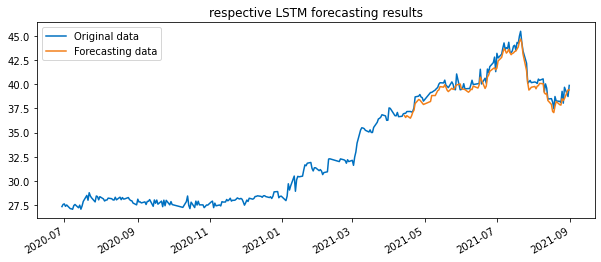

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9258749345139083
RMSE: 0.5686660891748085
MAE: 0.4862978755207004
MAPE: 1.1998577493912617

White noise


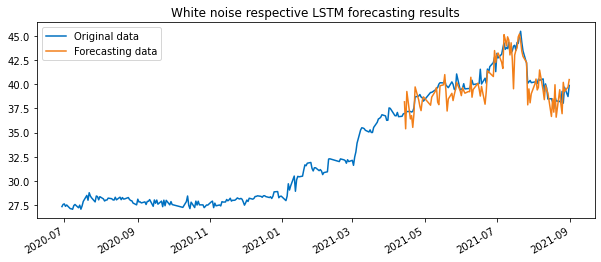

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.682410379062043
RMSE: 1.1770853012269014
MAE: 0.902864863635228
MAPE: 2.2389695939505256

All-average series


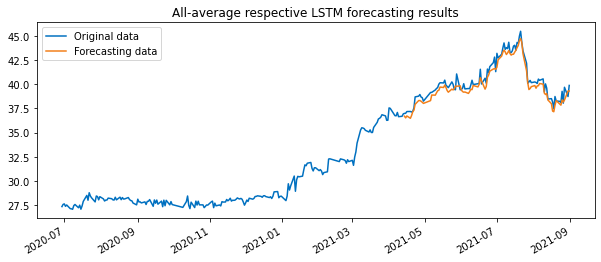

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9214955970554414
RMSE: 0.5852235490226609
MAE: 0.49650750831776536
MAPE: 1.2239582199367014

All-zero series


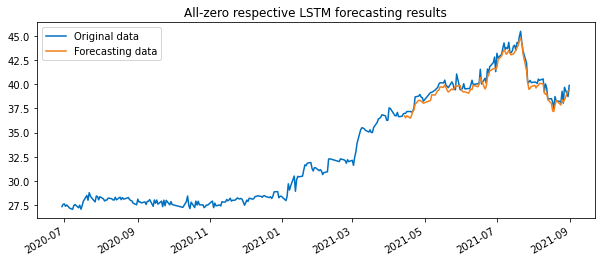

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9255764038274791
RMSE: 0.5698100591217525
MAE: 0.4803886352663001
MAPE: 1.1841819554241007


In [29]:
# Repalce the forecasting results of IMF0 by all-zero series
PERIODS = 100
series_ori = series[-PERIODS:]

# Normalization
res_pred = df_price.T.sum()
res_pred_allzero = df_price[df_price.columns[1:]].T.sum()
res_pred_mean = series_mean + res_pred_allzero
res_pred_wn = series_wn + res_pred_allzero

# Plot
print('original')
cl.plot_all('respective',res_pred)  # plot chart to campare
evl_ori = cl.evl(series_ori,res_pred,scale='carbon prices') 

print('\nWhite noise')
cl.plot_all('White noise respective',res_pred_wn) 
evl_wn = cl.evl(series_ori,res_pred_wn,scale='carbon prices') 

print('\nAll-average series')
cl.plot_all('All-average respective',res_pred_mean)  
evl_mean = cl.evl(series_ori,res_pred_mean,scale='carbon prices') 

print('\nAll-zero series')
cl.plot_all('All-zero respective',res_pred_allzero)  # plot chart to campare
evl_0 = cl.evl(series_ori,res_pred_allzero,scale='carbon prices') 

## 4.5. Other decomposition methods

In [6]:
# EMD
cl.declare_vars(mode='emd') # default epochs=100
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

##################################
Global Variables
##################################
MODE:EMD
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of EMD is running...
Multiple predictions completed, taking 9817.606s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [3]:
# EEMD
cl.declare_vars(mode='eemd') # default epochs=100
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

##################################
Global Variables
##################################
MODE:EEMD
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of EEMD is running...
Multiple predictions completed, taking 12446.751s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


## 4.6. Unified normalization

In [32]:
# describe series
series.describe()

count    1600.000000
mean       23.579744
std        12.420860
min         8.100000
25%        14.575000
50%        20.530000
75%        28.125000
max        77.000000
dtype: float64

In [33]:
# describe input matrix
df_ceemd = pd.read_csv(PATH+'ceemdan_data.csv',header=0,index_col=0)
df_ceemd.describe()

imf0         imf1         imf2         imf3         imf4  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     -0.020609    -0.000194    -0.016450    -0.027206     0.121399   
std       0.650891     0.558076     1.301735     1.411559     2.015397   
min      -5.793206    -4.037427    -7.163981    -7.234879    -8.140654   
25%      -0.243620    -0.189858    -0.218686    -0.285473    -0.428961   
50%      -0.006568    -0.010058    -0.006406     0.003530     0.003576   
75%       0.222051     0.166003     0.213428     0.280713     0.462920   
max       5.666957     4.736774     7.616861     7.489887     9.250994   

              imf5         imf6         imf7  
count  1600.000000  1600.000000  1600.000000  
mean      0.002438     5.553929    17.966437  
std       3.880943     6.808654     6.023137  
min      -9.970974    -8.160483    10.874910  
25%      -1.138832     1.669387    12.411688  
50%       0.037723     6.335560    16.726451  
75%       0.906670    10.721775    22.531875  
max      13.301447    21.428791    31.891165

In [3]:
# Attention!!! The results will be added to the log of no unified normalization.
# Attention!!! Need to change the create_dateback() first.
# Method (1): dividing all data by max-min
cl.declare_uni_method(method=1)
cl.declare_vars(mode='ceemdan') # default epochs=100
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True,uni_nor=True)

Unified normalization method (1) is start using.
##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 10968.205s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [4]:
# Method (2): replace max min of the input matrix
cl.declare_uni_method(method=2)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True,uni_nor=True)

Unified normalization method (2) is start using.
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 11343.275s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [5]:
# Method (3): replace min of input matrix and max of carbon prices
cl.declare_uni_method(method=3)
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True,uni_nor=True)

Unified normalization method (3) is start using.
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 11183.193s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


## 4.7. Re-decomposition

## Single

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:1000
##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
This is Single LSTM Forecasting running...
Get input pd.Series named: imf0
Part of Inputting dataset:
0      -0.359335
1       0.301536
2      -0.370368
3       0.623651
4      -0.280327
          ...   
1595    0.567962
1596   -0.640582
1597    0.685345
1598   -0.699218
1599    0.456359
Name: imf0, Length: 1600, dtype: float64

Input Shape: (30,1)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.00355583239546986
RMSE: 0.03080075398777121
MAE: 0.024837046778558688
MAPE: 4.993866976994944


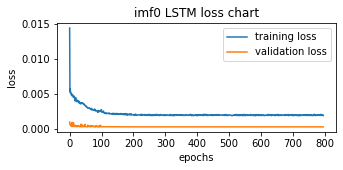

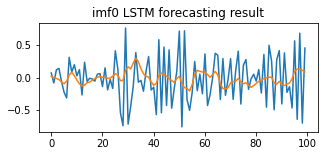

##################################
Model Evaluation with scale of input series
##################################
R2: 0.003555830710012642
RMSE: 0.354602504079236
MAE: 0.2859436160906768
MAPE: 130.2496126167638
Running time: 493.789s
Single LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\test_single_log.csv


In [15]:
# 1000 epochs single (a test) 
df_redecom = pd.read_csv(PATH+'ceemdan_data.csv',header=0,index_col=0)
cl.declare_vars(epochs=1000)
cl.Single_LSTM(series=df_redecom['imf0'],show_model=False)

## CEEMDAN

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:Origin
DATE_BACK:30
PERIODS:100
EPOCHS:100
Re-decomposition is running for imf0.
Get input pd.Series named: imf0
CEEMDAN decomposition is running.


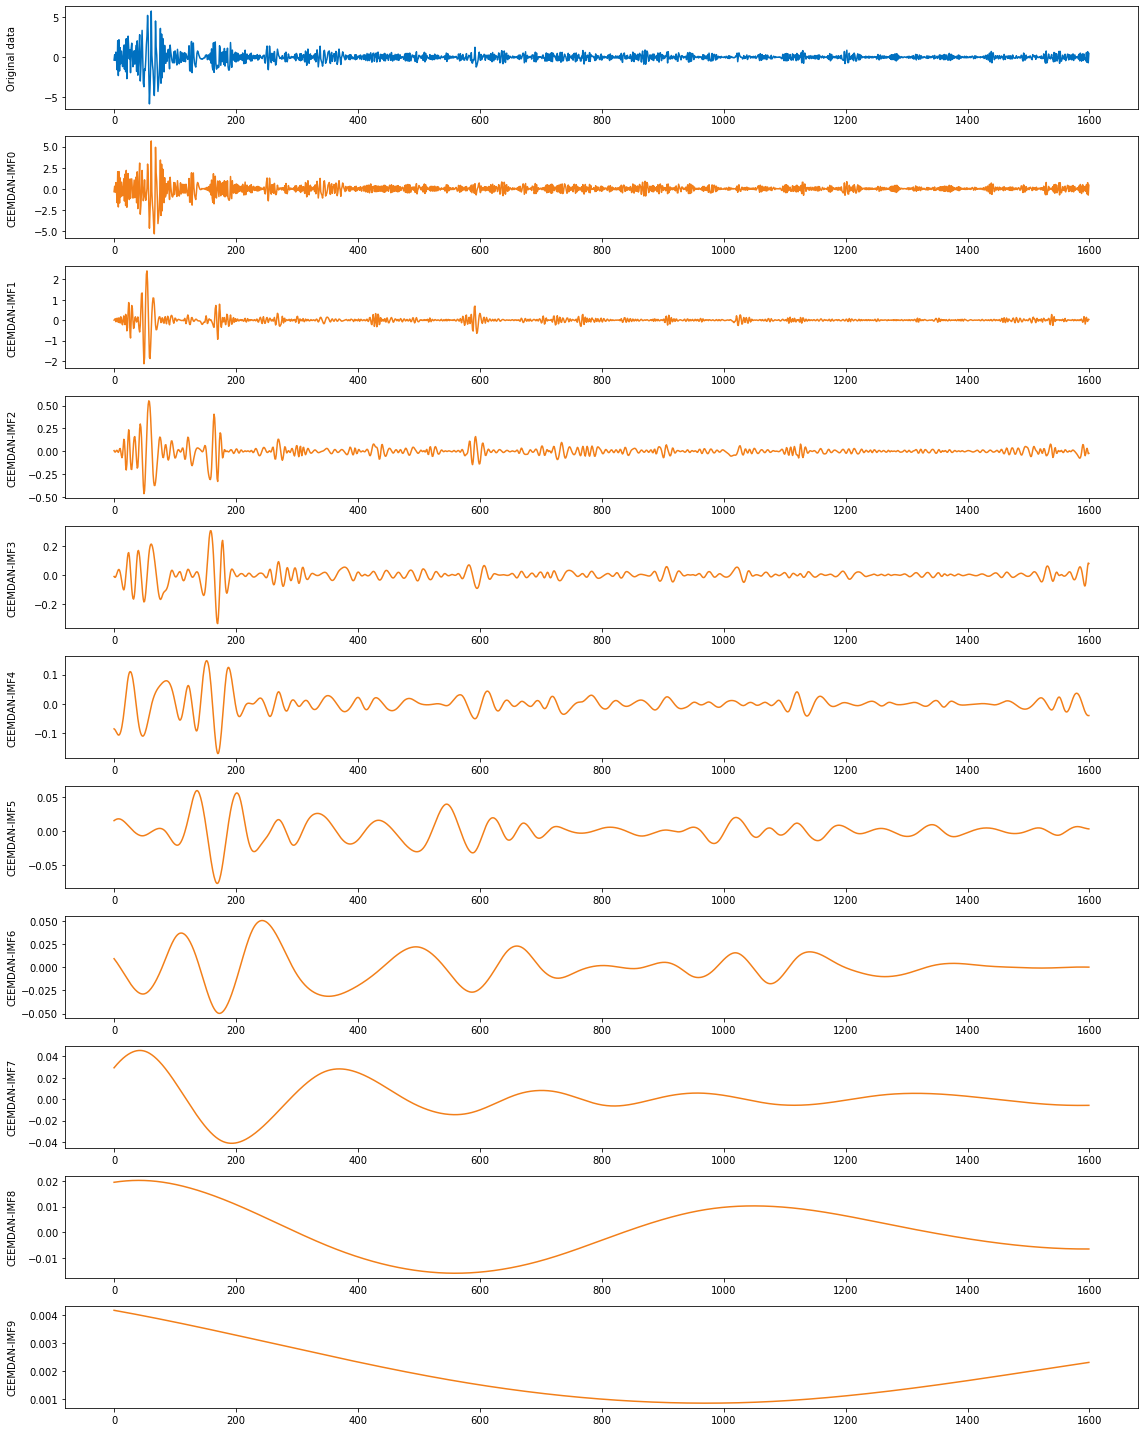

Re-decomposition finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_rce0_data.csv


imf0-rce0  imf0-rce1  imf0-rce2  imf0-rce3  imf0-rce4  imf0-rce5  \
0     -0.348608   0.001231   0.006465  -0.010493  -0.085923   0.015566   
1      0.296581   0.036307  -0.006071  -0.016119  -0.087674   0.016225   
2     -0.405229   0.072196  -0.009351  -0.016593  -0.090304   0.016798   
3      0.725327  -0.076891   0.000307  -0.010426  -0.093859   0.017282   
4     -0.254110  -0.017765   0.009711   0.000376  -0.097886   0.017673   
...         ...        ...        ...        ...        ...        ...   
1595   0.474085   0.137010   0.017034  -0.018595  -0.035778   0.003877   
1596  -0.623286  -0.026684   0.031659   0.021970  -0.038257   0.003685   
1597   0.722777  -0.061590   0.010810   0.059349  -0.039853   0.003522   
1598  -0.755186   0.048538  -0.027227   0.081475  -0.040538   0.003390   
1599   0.416166   0.031854  -0.023461   0.078474  -0.040299   0.003296   

      imf0-rce6  imf0-rce7  imf0-rce8  imf0-rce9      imf1      imf2  \
0      0.009349   0.029428   0.019471   0.004181 -0.229274 -0.217522   
1      0.008483   0.030121   0.019506   0.004177  0.203572  0.401021   
2      0.007600   0.030803   0.019541   0.004173  0.170385  0.938181   
3      0.006697   0.031472   0.019574   0.004169 -0.019834  1.111469   
4      0.005775   0.032128   0.019607   0.004165  0.327224  0.805718   
...         ...        ...        ...        ...       ...       ...   
1595   0.000273  -0.005721  -0.006531   0.002308  0.085835 -0.048996   
1596   0.000262  -0.005714  -0.006530   0.002311 -0.155259  0.092495   
1597   0.000250  -0.005706  -0.006530   0.002315 -0.134432  0.310807   
1598   0.000238  -0.005697  -0.006529   0.002318  0.071206  0.443470   
1599   0.000224  -0.005688  -0.006528   0.002321  0.072967  0.352140   

          imf3      imf4       imf5       imf6       imf7  
0     1.628739 -7.755605  13.739888  15.470065  40.723043  
1     1.944434 -7.758308  13.787643  15.450857  40.669245  
2     2.122090 -7.732592  13.826599  15.430433  40.615271  
3     2.135560 -7.677504  13.856743  15.408793  40.561122  
4     1.969044 -7.592564  13.878172  15.385935  40.506798  
...        ...       ...        ...        ...        ...  
1595 -2.530546 -0.818511   0.020653   6.431700  35.571903  
1596 -2.455234 -0.813008   0.020218   6.427147  35.574223  
1597 -2.377157 -0.803305   0.021041   6.421384  35.576317  
1598 -2.301566 -0.789600   0.023103   6.414419  35.578185  
1599 -2.231850 -0.772087   0.026383   6.406258  35.579829  

[1600 rows x 17 columns]

In [2]:
# re-decompose IMF0 by CEEMDAN,  imf0 of ceemdan_data.csv
cl.declare_vars(mode='ceemdan') # its determine the input data
cl.re_decom(redecom_mode='ceemdan',redecom_list=0) 

In [5]:
# predict above with the ensemble method
# IMF0 is broken down into 10 
df_redecom = pd.read_csv(PATH+'ceemdan_rce0_data.csv',header=0,index_col=0)
input_columns = ['imf0-rce'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
cl.declare_vars(mode='ceemdan',form='_rce0')
cl.Multi_pred(df=df_input,run_times=25,single_lstm=True,ensemble_lstm=True) # single_lstm also included
# output test_single_log.csv
# output test_ensemble_ceemdan_rce0_log.csv

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rce0
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_rce0 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 2669.968s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rce0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
This is Ensemble LSTM Forecasting running...
Get input pd.DataFrame.
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4      imf5      imf6  \
0    -0.348608  0.001231  0.006465 -0.010493 -0.085923  0.015566  0.009349   
1     0.296581  0.036307 -0.006071 -0.016119 -0.087674  0.016225  0.008483   
2    -0.405229  0.072196 -0.009351 -0.016593 -0.090304  0.016798  0.007600   
3     0.725327 -0.076891  0.000307 -0.010426 -0.093859  0.017282  0.006697   
4    -0.254110 -0.017765  0.009711  0.000376 -0.097886  0.017673  0.005775   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.

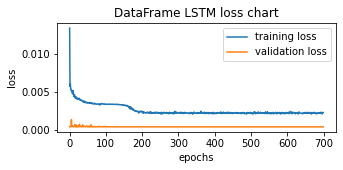

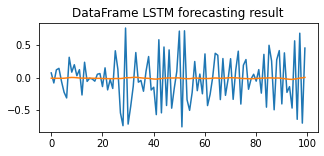

##################################
Model Evaluation with scale of input df
##################################
R2: 0.006611064366268571
RMSE: 0.3540584569202943
MAE: 0.28929149242938895
MAPE: 98.26768402233894
Running time: 400.229s
Ensemble LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\test_ensemble_ceemdan_rce0_log.csv


In [11]:
# 1000 epochs
df_redecom = pd.read_csv(PATH+'ceemdan_rce0_data.csv',header=0,index_col=0)
input_columns = ['imf0-rce'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
cl.declare_vars(mode='ceemdan',form='_rce0',epochs=1000)
cl.Ensemble_LSTM(df=df_input,show_model=False)

## EMD

Re-decomposition is running for imf0.
Get input pd.Series named: imf0
EMD decomposition is running.


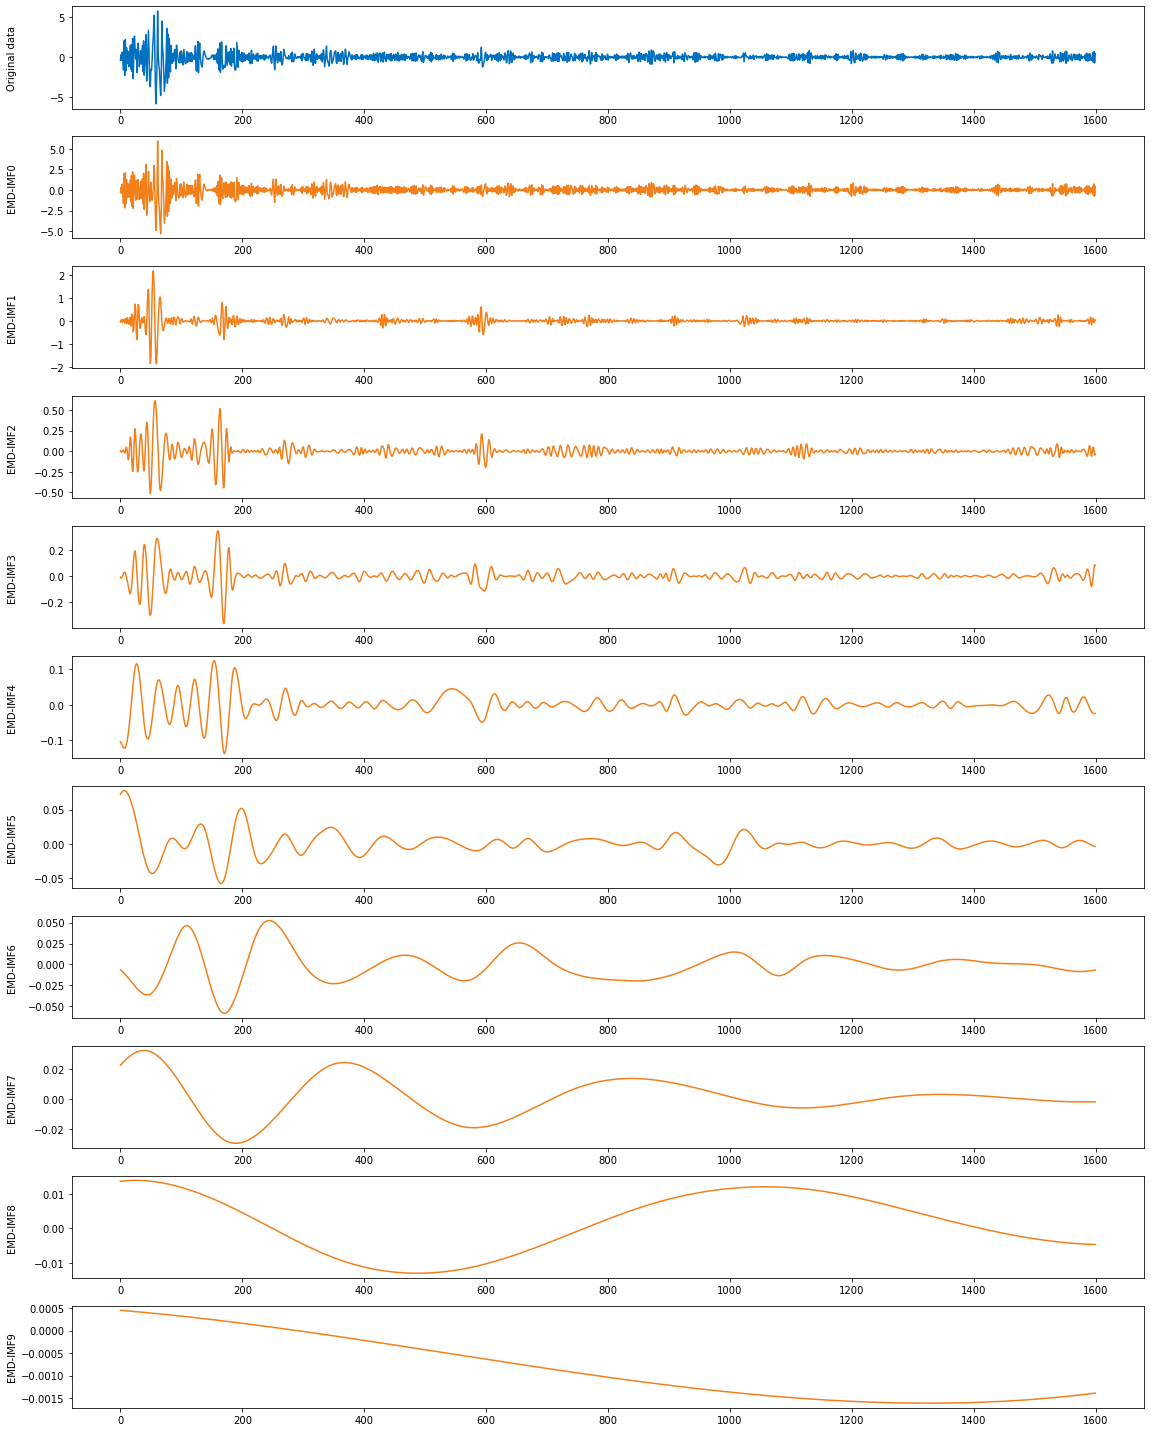

Re-decomposition finished, check the dataset D:\CEEMDAN_LSTM\ceemdan_re0_data.csv


imf0-re0  imf0-re1  imf0-re2  imf0-re3  imf0-re4  imf0-re5  imf0-re6  \
0    -0.305872 -0.055261  0.010888 -0.007409 -0.104380  0.072452 -0.006270   
1     0.293400  0.031742 -0.006502 -0.013801 -0.107373  0.073960 -0.006885   
2    -0.399965  0.060651 -0.012123 -0.013420 -0.110687  0.075235 -0.007525   
3     0.697979 -0.061244 -0.000042 -0.004730 -0.114317  0.076269 -0.008191   
4    -0.272724 -0.017512  0.012911  0.008275 -0.117821  0.077051 -0.008882   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.480259  0.116920  0.038859 -0.027110 -0.023274 -0.002430 -0.007156   
1596 -0.629364 -0.037727  0.051065  0.017509 -0.024143 -0.002780 -0.007038   
1597  0.722765 -0.065986  0.010673  0.060501 -0.024501 -0.003091 -0.006915   
1598 -0.751567  0.057390 -0.048581  0.086204 -0.024422 -0.003357 -0.006789   
1599  0.426696  0.026265 -0.035976  0.081672 -0.023972 -0.003577 -0.006658   

      imf0-re7  imf0-re8  imf0-re9      imf1      imf2      imf3      imf4  \
0     0.022439  0.013628  0.000449 -0.229274 -0.217522  1.628739 -7.755605   
1     0.022903  0.013646  0.000448  0.203572  0.401021  1.944434 -7.758308   
2     0.023357  0.013663  0.000447  0.170385  0.938181  2.122090 -7.732592   
3     0.023802  0.013679  0.000446 -0.019834  1.111469  2.135560 -7.677504   
4     0.024237  0.013694  0.000445  0.327224  0.805718  1.969044 -7.592564   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.002041 -0.004671 -0.001395  0.085835 -0.048996 -2.530546 -0.818511   
1596 -0.002035 -0.004676 -0.001394 -0.155259  0.092495 -2.455234 -0.813008   
1597 -0.002028 -0.004681 -0.001392 -0.134432  0.310807 -2.377157 -0.803305   
1598 -0.002020 -0.004686 -0.001390  0.071206  0.443470 -2.301566 -0.789600   
1599 -0.002013 -0.004690 -0.001389  0.072967  0.352140 -2.231850 -0.772087   

           imf5       imf6       imf7  
0     13.739888  15.470065  40.723043  
1     13.787643  15.450857  40.669245  
2     13.826599  15.430433  40.615271  
3     13.856743  15.408793  40.561122  
4     13.878172  15.385935  40.506798  
...         ...        ...        ...  
1595   0.020653   6.431700  35.571903  
1596   0.020218   6.427147  35.574223  
1597   0.021041   6.421384  35.576317  
1598   0.023103   6.414419  35.578185  
1599   0.026383   6.406258  35.579829  

[1600 rows x 17 columns]

In [3]:
# re-decompose IMF0 by EMD, imf0 of ceemdan_data.csv
cl.re_decom(redecom_mode='emd',redecom_list=0) 

In [4]:
# predict above with the ensemble method
# IMF0 is broken down into 10 
df_redecom = pd.read_csv(PATH+'ceemdan_re0_data.csv',header=0,index_col=0)
input_columns = ['imf0-re'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
cl.declare_vars(mode='ceemdan',form='_re0')
cl.Multi_pred(df=df_input,run_times=25,ensemble_lstm=True)
# output test_ensemble_ceemdan_re0_log.csv

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_re0
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_re0 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 1234.733s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_re0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
This is Ensemble LSTM Forecasting running...
Get input pd.DataFrame.
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4      imf5      imf6  \
0    -0.305872 -0.055261  0.010888 -0.007409 -0.104380  0.072452 -0.006270   
1     0.293400  0.031742 -0.006502 -0.013801 -0.107373  0.073960 -0.006885   
2    -0.399965  0.060651 -0.012123 -0.013420 -0.110687  0.075235 -0.007525   
3     0.697979 -0.061244 -0.000042 -0.004730 -0.114317  0.076269 -0.008191   
4    -0.272724 -0.017512  0.012911  0.008275 -0.117821  0.077051 -0.008882   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.4

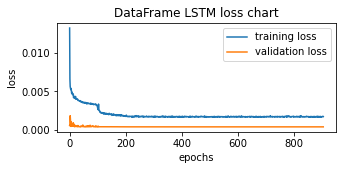

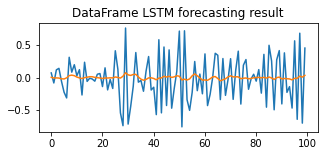

##################################
Model Evaluation with scale of input df
##################################
R2: 0.035659023406460655
RMSE: 0.3488434906613408
MAE: 0.28465012434266784
MAPE: 100.41180934968219
Running time: 564.364s
Ensemble LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\test_ensemble_ceemdan_re0_log.csv


In [13]:
# 1000 epochs
df_redecom = pd.read_csv(PATH+'ceemdan_re0_data.csv',header=0,index_col=0)
input_columns = ['imf0-re'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
cl.declare_vars(mode='ceemdan',form='_re0',epochs=1000)
cl.Ensemble_LSTM(df=df_input,show_model=False)

## EEMD

Re-decomposition is running for imf0.
Get input pd.Series named: imf0
EEMD decomposition is running.


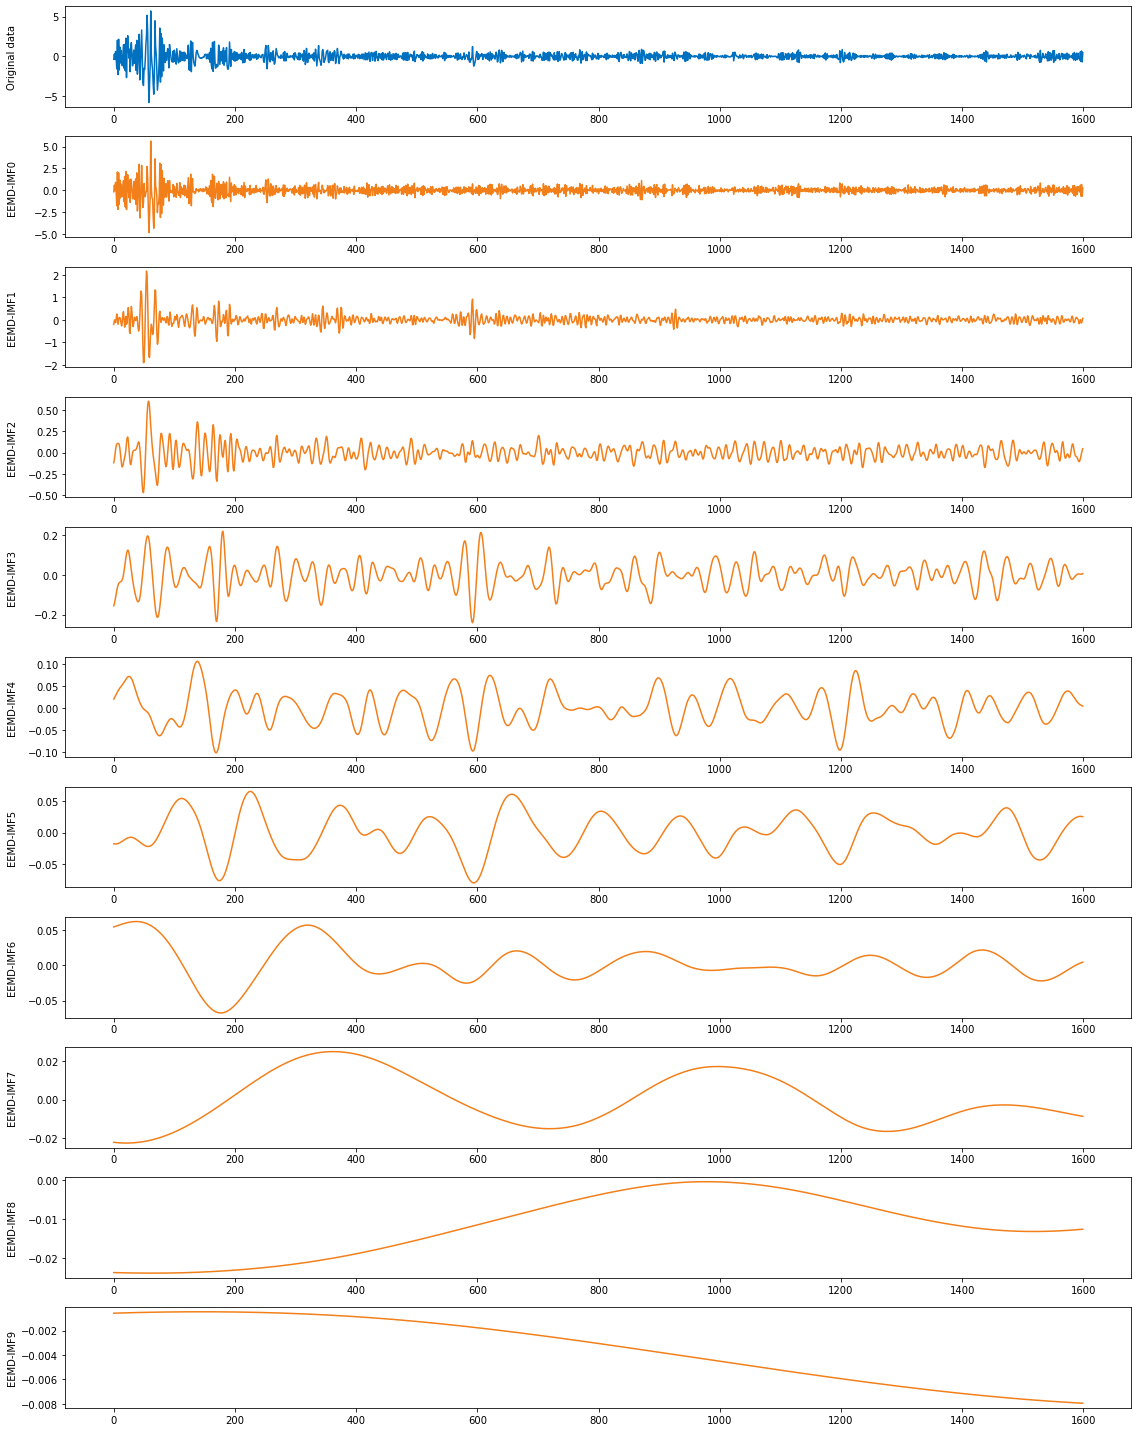

Re-decomposition finished, check the dataset D:\CEEMDAN_LSTM\ceemdan_ree0_data.csv


imf0-ree0  imf0-ree1  imf0-ree2  imf0-ree3  imf0-ree4  imf0-ree5  \
0     -0.171336  -0.204441  -0.119471  -0.155978   0.020686  -0.017591   
1      0.581818  -0.019909  -0.081562  -0.145252   0.023452  -0.017817   
2     -0.058826  -0.003667  -0.021177  -0.130786   0.026196  -0.017954   
3      0.903326  -0.126114   0.038274  -0.113917   0.028927  -0.018001   
4     -0.261340   0.035171   0.079139  -0.096160   0.031617  -0.017959   
...         ...        ...        ...        ...        ...        ...   
1595   0.584790   0.006755  -0.072704   0.003012   0.007416   0.025670   
1596  -0.663232  -0.065621  -0.038989   0.002699   0.006558   0.025644   
1597   0.665003  -0.143793  -0.003509   0.002979   0.005816   0.025544   
1598  -0.677772  -0.029009   0.027926   0.004050   0.005170   0.025372   
1599   0.279173   0.068728   0.046250   0.006178   0.004613   0.025128   

      imf0-ree6  imf0-ree7  imf0-ree8  imf0-ree9      imf1      imf2  \
0      0.054744  -0.022095  -0.023699  -0.000577 -0.229274 -0.217522   
1      0.055040  -0.022132  -0.023703  -0.000575  0.203572  0.401021   
2      0.055336  -0.022168  -0.023707  -0.000574  0.170385  0.938181   
3      0.055631  -0.022201  -0.023711  -0.000572 -0.019834  1.111469   
4      0.055927  -0.022233  -0.023715  -0.000571  0.327224  0.805718   
...         ...        ...        ...        ...       ...       ...   
1595   0.003389  -0.008462  -0.012664  -0.007942  0.085835 -0.048996   
1596   0.003736  -0.008521  -0.012651  -0.007944 -0.155259  0.092495   
1597   0.004067  -0.008579  -0.012637  -0.007947 -0.134432  0.310807   
1598   0.004384  -0.008637  -0.012624  -0.007950  0.071206  0.443470   
1599   0.004685  -0.008694  -0.012610  -0.007952  0.072967  0.352140   

          imf3      imf4       imf5       imf6       imf7  
0     1.628739 -7.755605  13.739888  15.470065  40.723043  
1     1.944434 -7.758308  13.787643  15.450857  40.669245  
2     2.122090 -7.732592  13.826599  15.430433  40.615271  
3     2.135560 -7.677504  13.856743  15.408793  40.561122  
4     1.969044 -7.592564  13.878172  15.385935  40.506798  
...        ...       ...        ...        ...        ...  
1595 -2.530546 -0.818511   0.020653   6.431700  35.571903  
1596 -2.455234 -0.813008   0.020218   6.427147  35.574223  
1597 -2.377157 -0.803305   0.021041   6.421384  35.576317  
1598 -2.301566 -0.789600   0.023103   6.414419  35.578185  
1599 -2.231850 -0.772087   0.026383   6.406258  35.579829  

[1600 rows x 17 columns]

In [4]:
# re-decompose IMF0 by EEMD, imf0 of ceemdan_data.csv
cl.re_decom(redecom_mode='eemd',redecom_list=0) 

In [3]:
# predict above with the ensemble method
# IMF0 is broken down into 10 
df_redecom = pd.read_csv(PATH+'ceemdan_ree0_data.csv',header=0,index_col=0)
input_columns = ['imf0-ree'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
cl.declare_vars(mode='ceemdan',form='_ree0')
cl.Multi_pred(df=df_input,run_times=25,ensemble_lstm=True)
# output test_ensemble_ceemdan_ree0_log.csv

##################################
Global Variables
##################################
MODE:EEMD
FORM:_ree0
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of EEMD_ree0 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 1225.449s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_ree0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
This is Ensemble LSTM Forecasting running...
Get input pd.DataFrame.
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4      imf5      imf6  \
0    -0.171336 -0.204441 -0.119471 -0.155978  0.020686 -0.017591  0.054744   
1     0.581818 -0.019909 -0.081562 -0.145252  0.023452 -0.017817  0.055040   
2    -0.058826 -0.003667 -0.021177 -0.130786  0.026196 -0.017954  0.055336   
3     0.903326 -0.126114  0.038274 -0.113917  0.028927 -0.018001  0.055631   
4    -0.261340  0.035171  0.079139 -0.096160  0.031617 -0.017959  0.055927   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.

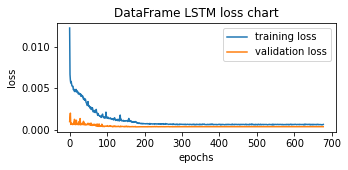

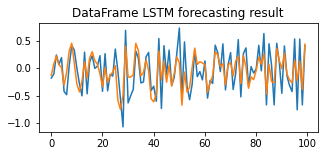

##################################
Model Evaluation with scale of input df
##################################
R2: 0.5887891832123657
RMSE: 0.24979422021365272
MAE: 0.20262986025063234
MAPE: 215.35539857345603
Running time: 420.993s
Ensemble LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\test_ensemble_ceemdan_ree0_log.csv


In [12]:
# 1000 epochs
df_redecom = pd.read_csv(PATH+'ceemdan_ree0_data.csv',header=0,index_col=0)
input_columns = ['imf0-ree'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
cl.declare_vars(mode='ceemdan',form='_ree0',epochs=1000)
cl.Ensemble_LSTM(df=df_input,show_model=False)

## VMD

Re-decomposition is running for imf0.
Get input pd.Series named: imf0


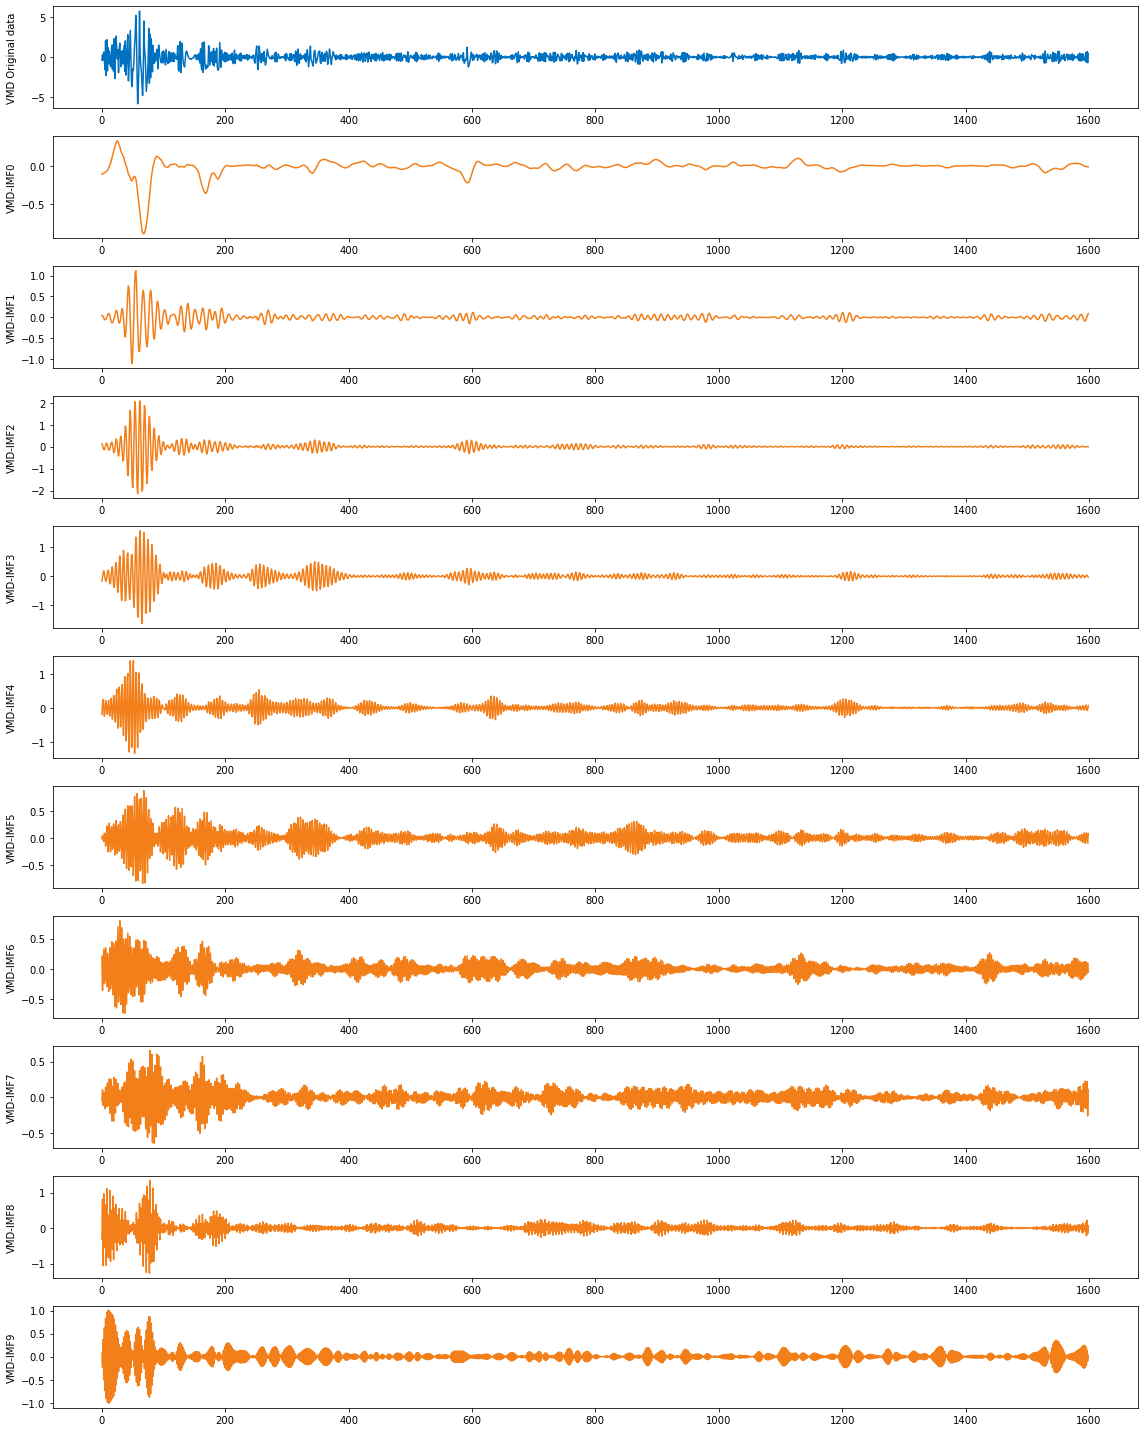

Re-decomposition finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_rv0_data.csv


imf0-rv0  imf0-rv1  imf0-rv2  imf0-rv3  imf0-rv4  imf0-rv5  imf0-rv6  \
0    -0.107739  0.048878  0.126857 -0.167654 -0.194374 -0.014516  0.208476   
1    -0.105990  0.035495  0.054600 -0.040856  0.114420  0.044073 -0.351990   
2    -0.101135  0.013657 -0.048018  0.119986  0.241770 -0.027089  0.032572   
3    -0.097531 -0.017154 -0.130539  0.185470 -0.023144 -0.065627  0.324945   
4    -0.092926 -0.044597 -0.139008  0.111660 -0.244109  0.089105 -0.242365   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.007184 -0.061383  0.002636  0.008720  0.078621  0.026272  0.120498   
1596 -0.009876 -0.023153  0.005504  0.036405 -0.001820  0.096599 -0.086738   
1597 -0.009813  0.024898  0.006066  0.032473 -0.078781 -0.045842 -0.030794   
1598 -0.011428  0.064357 -0.000267 -0.004269 -0.040286 -0.096681  0.098295   
1599 -0.010223  0.090674 -0.000221 -0.030728  0.068916  0.077013 -0.051379   

      imf0-rv7  imf0-rv8  imf0-rv9      imf1      imf2      imf3      imf4  \
0    -0.043211 -0.303809  0.074068 -0.229274 -0.217522  1.628739 -7.755605   
1     0.106003  0.813371 -0.226025  0.203572  0.401021  1.944434 -7.758308   
2    -0.109990 -1.062133  0.370601  0.170385  0.938181  2.122090 -7.732592   
3     0.042775  0.966864 -0.504309 -0.019834  1.111469  2.135560 -7.677504   
4     0.070930 -0.549882  0.627114  0.327224  0.805718  1.969044 -7.592564   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.149965  0.163766  0.216850  0.085835 -0.048996 -2.530546 -0.818511   
1596 -0.044099 -0.217245 -0.185886 -0.155259  0.092495 -2.455234 -0.813008   
1597  0.221923  0.220239  0.144222 -0.134432  0.310807 -2.377157 -0.803305   
1598 -0.254601 -0.165064 -0.092950  0.071206  0.443470 -2.301566 -0.789600   
1599  0.111234  0.061584  0.034041  0.072967  0.352140 -2.231850 -0.772087   

           imf5       imf6       imf7  
0     13.739888  15.470065  40.723043  
1     13.787643  15.450857  40.669245  
2     13.826599  15.430433  40.615271  
3     13.856743  15.408793  40.561122  
4     13.878172  15.385935  40.506798  
...         ...        ...        ...  
1595   0.020653   6.431700  35.571903  
1596   0.020218   6.427147  35.574223  
1597   0.021041   6.421384  35.576317  
1598   0.023103   6.414419  35.578185  
1599   0.026383   6.406258  35.579829  

[1600 rows x 17 columns]

In [2]:
# re-decompose IMF0 by VMD, imf0 of ceemdan_data.csv
cl.re_decom(redecom_mode='vmd',redecom_list=0,imfs_num=10) 

In [2]:
# predict above with the ensemble method
# IMF0 is broken down into 10
df_ceemdan = pd.read_csv(PATH+'ceemdan_data.csv',header=0,index_col=0)
df_redecom = pd.read_csv(PATH+'ceemdan_rv0_data.csv',header=0,index_col=0)
input_columns = ['imf0-rv'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
df_input['sum'] = df_ceemdan['imf0']
cl.declare_vars(mode='ceemdan',form='_rv0') # number stands for VMD
#cl.Multi_pred(df=df_input,run_times=25,ensemble_lstm=True) 
# output test_ensemble_ceemdan_rv0_log.csv

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_rv0 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 1329.074s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
This is Ensemble LSTM Forecasting running...
Get input pd.DataFrame.
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4      imf5      imf6  \
0    -0.107739  0.048878  0.126857 -0.167654 -0.194374 -0.014516  0.208476   
1    -0.105990  0.035495  0.054600 -0.040856  0.114420  0.044073 -0.351990   
2    -0.101135  0.013657 -0.048018  0.119986  0.241770 -0.027089  0.032572   
3    -0.097531 -0.017154 -0.130539  0.185470 -0.023144 -0.065627  0.324945   
4    -0.092926 -0.044597 -0.139008  0.111660 -0.244109  0.089105 -0.242365   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.0

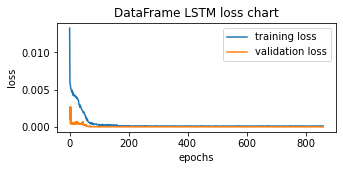

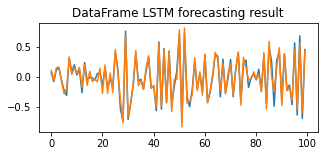

##################################
Model Evaluation with scale of input df
##################################
R2: 0.9520368646844175
RMSE: 0.0777981187627169
MAE: 0.061726183638263536
MAPE: 59.48233045477382
Running time: 542.571s
Ensemble LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\test_ensemble_ceemdan_rv0_log.csv


0
0   0.110115
1  -0.058639
2   0.153058
3   0.161517
4  -0.073536
..       ...
95  0.447765
96 -0.537200
97  0.559520
98 -0.602535
99  0.437716

[100 rows x 1 columns]

In [4]:
# 1000 epochs
df_ceemdan = pd.read_csv(PATH+'ceemdan_data.csv',header=0,index_col=0)
df_redecom = pd.read_csv(PATH+'ceemdan_rv0_data.csv',header=0,index_col=0)
input_columns = ['imf0-rv'+str(i) for i in range(10)]
df_input = df_redecom[input_columns]
df_input['sum'] = df_ceemdan['imf0']
cl.declare_vars(mode='ceemdan',form='_rv0',epochs=1000) 
cl.Ensemble_LSTM(df=df_input,show_model=False)

## Comparison

original


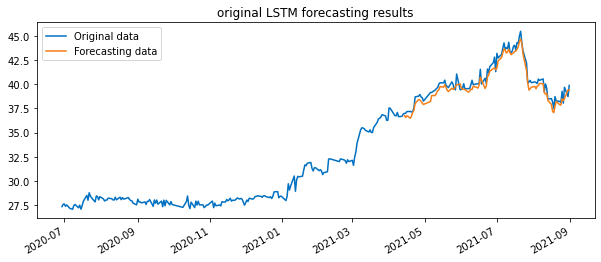

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9258749345139083
RMSE: 0.5686660891748085
MAE: 0.4862978755207004
MAPE: 1.1998577493912617
Re-decom EMD


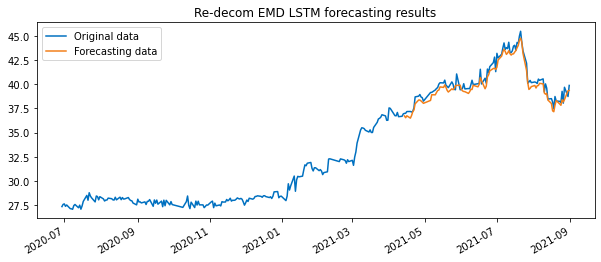

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9267352101292212
RMSE: 0.5653565657890978
MAE: 0.47889575764549996
MAPE: 1.18068625447623

Re-decom EEMD


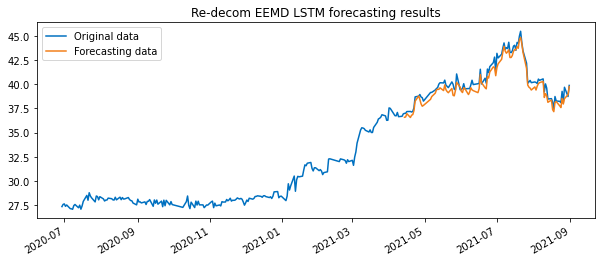

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9252967103036477
RMSE: 0.5708797650813543
MAE: 0.4997906337017
MAPE: 1.2335353604284633

Re-decom CEEMDAN


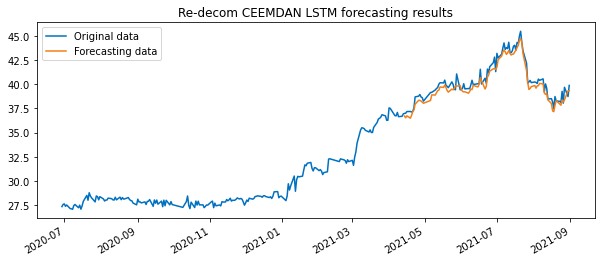

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9241108249441984
RMSE: 0.5753931694139457
MAE: 0.48641270356419997
MAPE: 1.1990798243630958

Re-decom VMD


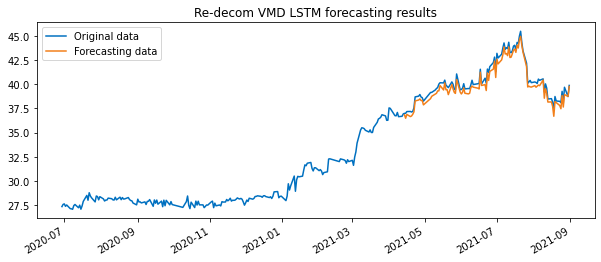

##################################
Model Evaluation with scale of carbon prices
##################################
R2: 0.9478792784569043
RMSE: 0.47684803322377756
MAE: 0.44791668390370015
MAPE: 1.1071328180085591


In [52]:
# Comparison of diiferent re-decomposition methods
df_emd = pd.read_csv(PATH+'ceemdan_data.csv',header=0,index_col=0)
df_ans = pd.read_csv(L_PATH+'respective_ceemdan_pred.csv',header=0,index_col=0)
series_re = pd.read_csv(L_PATH+'ensemble_ceemdan_re0_pred.csv',header=0,index_col=0,squeeze=True)
series_ree = pd.read_csv(L_PATH+'ensemble_ceemdan_ree0_pred.csv',header=0,index_col=0,squeeze=True)
series_rce = pd.read_csv(L_PATH+'ensemble_ceemdan_rce0_pred.csv',header=0,index_col=0,squeeze=True)
series_rv = pd.read_csv(L_PATH+'ensemble_ceemdan_rv0_pred.csv',header=0,index_col=0,squeeze=True)

PERIODS = 100
series_ori = series[-PERIODS:]

series_test = df_emd['imf0'][-PERIODS:]
res_pred_allzero = df_ans[df_ans.columns[1:]].T.sum()
res_ori = df_ans.T.sum()
res_re = res_pred_allzero + series_re
res_ree = res_pred_allzero + series_ree
res_rce = res_pred_allzero + series_rce
res_rv = res_pred_allzero + series_rv
# original
print('original')
cl.plot_all('original',res_ori)  # plot chart to campare
evl_ori = cl.evl(series_ori,res_ori,scale='carbon prices') 

# Plot
print('Re-decom EMD')
cl.plot_all('Re-decom EMD',res_re)  # plot chart to campare
evl_re = cl.evl(series_ori,res_re,scale='carbon prices') 

print('\nRe-decom EEMD')
cl.plot_all('Re-decom EEMD',res_ree) 
evl_ree = cl.evl(series_ori,res_ree,scale='carbon prices') 

print('\nRe-decom CEEMDAN')
cl.plot_all('Re-decom CEEMDAN',res_rce)  
evl_rce = cl.evl(series_ori,res_rce,scale='carbon prices') 

print('\nRe-decom VMD')
cl.plot_all('Re-decom VMD',res_rv)  # plot chart to campare
evl_rv = cl.evl(series_ori,res_rv,scale='carbon prices') 

# 5. Hybrid Forecasting

## 5.1. Hybrid LSTM Forecasting

This is Hybrid LSTM Forecasting running...

Only respective method result:
##################################
Model Evaluation with scale of input df
##################################
R2: 0.8690332048901779
RMSE: 0.7558844063167548
MAE: 0.6500775790391498
MAPE: 1.6061177947240122

Hybrid LSTM Forecasting is still running...

Input Shape: (31,8)

##################################
Model Evaluation with scale of 0 to 1
##################################
R2: 0.871789790238865
RMSE: 0.010854676118192312
MAE: 0.008627702589304957
MAPE: 1.8559416705157668


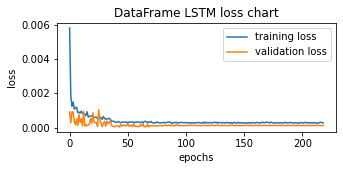

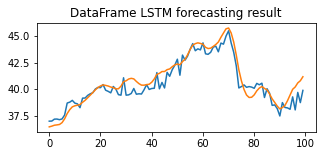

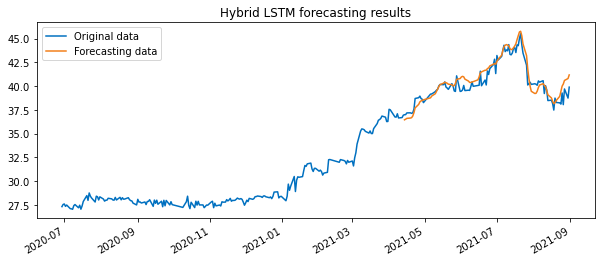

##################################
Model Evaluation with scale of input df
##################################
R2: 0.8717897662976437
RMSE: 0.7478872543714765
MAE: 0.5944488418579101
MAPE: 1.4805005390435062
Running time: 136.583s


In [2]:
# Default parameters ceemdan_data
cl.Hybrid_LSTM()

In [2]:
cl.declare_vars(mode='ceemdan_se',form='233') 
cl.Multi_pred(run_times=10,hybrid_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 6239.582s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [3]:
cl.declare_vars(mode='ceemdan') 
cl.Multi_pred(run_times=10,hybrid_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 8621.943s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [4]:
cl.declare_vars(mode='ceemdan_se',form='44') 
cl.Multi_pred(run_times=10,hybrid_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:44
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE44 is running...
Multiple predictions completed, taking 5469.392s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [5]:
cl.declare_vars(mode='ceemdan_se',form='323') 
cl.Multi_pred(run_times=10,hybrid_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:323
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE323 is running...
Multiple predictions completed, taking 6500.198s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [6]:
cl.declare_vars(mode='ceemdan_se',form='2123') 
cl.Multi_pred(run_times=10,hybrid_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2123
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE2123 is running...
Multiple predictions completed, taking 6742.277s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


## 5.2. Hybrid LSTM Forecasting with VMD

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
This is Hybrid LSTM Forecasting running...

Respective method result:
##################################
Model Evaluation with scale of input df
##################################
R2: 0.9258749345139083
RMSE: 0.5686660891748085
MAE: 0.4862978755207004
MAPE: 1.1998577493912617

Hybrid LSTM Forecasting is still running...
##################################
Model Evaluation with scale of IMF0
##################################
R2: 0.9586400270110906
RMSE: 0.07224460755138859
MAE: 0.057164705751574785
MAPE: 56.37462740031884

VMD method result:
##################################
Model Evaluation with scale of input df
##################################
R2: 0.9442752363793954
RMSE: 0.4930590147054724
MAE: 0.4679540690227821
MAPE: 1.1575472629460757

Hybrid LSTM Forecasting is still running...

Input Shape: (31,8)

##################################
Mo

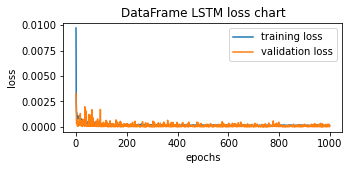

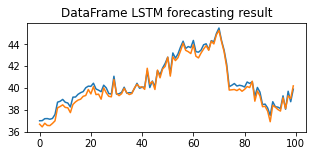

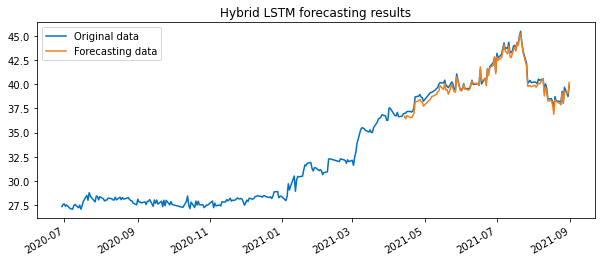

##################################
Model Evaluation with scale of input df
##################################
R2: 0.9701104366774127
RMSE: 0.3611058890646847
MAE: 0.31345383148193356
MAPE: 0.7829086367465189
Running time: 1219.994s
Hybrid LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\hybrid_ceemdan_log.csv


In [3]:
cl.declare_vars(epochs=100) 
cl.Hybrid_LSTM(redecom='vmd')

In [7]:
cl.declare_vars(mode='ceemdan_se',form='233') 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd')

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 11690.489s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [8]:
cl.declare_vars(mode='ceemdan') 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd')

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN is running...
Multiple predictions completed, taking 13825.036s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [3]:
cl.declare_vars(mode='ceemdan_se',form='44') 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd')

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:44
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE44 is running...
Multiple predictions completed, taking 10681.263s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [2]:
cl.declare_vars(mode='ceemdan_se',form='323') 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd')

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:323
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE323 is running...
Multiple predictions completed, taking 11176.779s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [9]:
cl.declare_vars(mode='ceemdan_se',form='2123') 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd')

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2123
DATE_BACK:30
PERIODS:100
EPOCHS:100
Multiple predictions of CEEMDAN_SE2123 is running...
Multiple predictions completed, taking 12285.836s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


# 5.3. Ensemble LSTM with VMD （Time-saving method）

In [22]:
# re-decompose IMF0,1,2,7 by VMD
cl.declare_vars(mode='ceemdan')
cl.re_decom(redecom_mode='vmd',redecom_list=[0],draw=False) 
cl.re_decom(redecom_mode='vmd',redecom_list=[0,1],draw=False) 
cl.re_decom(redecom_mode='vmd',redecom_list=[0,1,2],draw=False) 
cl.re_decom(redecom_mode='vmd',redecom_list=[0,1,2,7],draw=False) 
cl.re_decom(redecom_mode='vmd',redecom_list=[0,1,2,6,7],draw=False) 

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
Re-decomposition is running for imf0.
Get input pd.Series named: imf0
Re-decomposition finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_rv0_data.csv
Re-decomposition is running for imf0.
Get input pd.Series named: imf0
Re-decomposition is running for imf1.
Get input pd.Series named: imf1
Re-decomposition finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_rv01_data.csv
Re-decomposition is running for imf0.
Get input pd.Series named: imf0
Re-decomposition is running for imf1.
Get input pd.Series named: imf1
Re-decomposition is running for imf2.
Get input pd.Series named: imf2
Re-decomposition finished, check the dataset:  D:\CEEMDAN_LSTM\ceemdan_rv012_data.csv
Re-decomposition is running for imf0.
Get input pd.Series named: imf0
Re-decomposition is running for imf1.
Get input pd.Series named: imf1
Re-decomposition is running for imf2.
Get i

imf0-rv0  imf0-rv1  imf0-rv2  imf0-rv3  imf0-rv4  imf0-rv5  imf0-rv6  \
0    -0.107739  0.048878  0.126857 -0.167654 -0.194374 -0.014516  0.208476   
1    -0.105990  0.035495  0.054600 -0.040856  0.114420  0.044073 -0.351990   
2    -0.101135  0.013657 -0.048018  0.119986  0.241770 -0.027089  0.032572   
3    -0.097531 -0.017154 -0.130539  0.185470 -0.023144 -0.065627  0.324945   
4    -0.092926 -0.044597 -0.139008  0.111660 -0.244109  0.089105 -0.242365   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.007184 -0.061383  0.002636  0.008720  0.078621  0.026272  0.120498   
1596 -0.009876 -0.023153  0.005504  0.036405 -0.001820  0.096599 -0.086738   
1597 -0.009813  0.024898  0.006066  0.032473 -0.078781 -0.045842 -0.030794   
1598 -0.011428  0.064357 -0.000267 -0.004269 -0.040286 -0.096681  0.098295   
1599 -0.010223  0.090674 -0.000221 -0.030728  0.068916  0.077013 -0.051379   

      imf0-rv7  imf0-rv8  imf0-rv9  ...   imf7-rv0  imf7-rv1  imf7-rv2  \
0    -0.043211 -0.303809  0.074068  ...  30.216136  7.309799  1.383809   
1     0.106003  0.813371 -0.226025  ...  30.215066  7.308551  1.382504   
2    -0.109990 -1.062133  0.370601  ...  30.213466  7.306600  1.380449   
3     0.042775  0.966864 -0.504309  ...  30.211692  7.304309  1.378020   
4     0.070930 -0.549882  0.627114  ...  30.209901  7.301839  1.375389   
...        ...       ...       ...  ...        ...       ...       ...   
1595 -0.149965  0.163766  0.216850  ...  32.607000  2.332813  0.341976   
1596 -0.044099 -0.217245 -0.185886  ...  32.607393  2.333126  0.342209   
1597  0.221923  0.220239  0.144222  ...  32.607699  2.333373  0.342395   
1598 -0.254601 -0.165064 -0.092950  ...  32.607915  2.333548  0.342531   
1599  0.111234  0.061584  0.034041  ...  32.608029  2.333643  0.342607   

      imf7-rv3  imf7-rv4  imf7-rv5  imf7-rv6  imf7-rv7  imf7-rv8  imf7-rv9  
0     0.068434  0.497526  0.382555  0.255674  0.151989  0.309190  0.100625  
1     0.062260  0.495898  0.381612  0.253632  0.149385  0.308003  0.096935  
2     0.051292  0.493224  0.380272  0.250170  0.144864  0.306198  0.090394  
3     0.037134  0.489909  0.378898  0.245741  0.138968  0.304166  0.081758  
4     0.021310  0.486149  0.377653  0.240583  0.132019  0.302090  0.071584  
...        ...       ...       ...       ...       ...       ...       ...  
1595  0.000714  0.032034  0.217229  0.008976  0.004278  0.024984  0.002068  
1596  0.001130  0.032179  0.217304  0.009128  0.004471  0.025055  0.002340  
1597  0.001503  0.032300  0.217371  0.009257  0.004633  0.025121  0.002570  
1598  0.001791  0.032393  0.217427  0.009357  0.004757  0.025177  0.002745  
1599  0.001954  0.032447  0.217463  0.009415  0.004828  0.025212  0.002843  

[1600 rows x 53 columns]

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:1000
This is Ensemble LSTM Forecasting running...
Get input pd.DataFrame.
Part of Inputting dataset:
          imf0      imf1      imf2      imf3      imf4      imf5      imf6  \
0    -0.107739  0.048878  0.126857 -0.167654 -0.194374 -0.014516  0.208476   
1    -0.105990  0.035495  0.054600 -0.040856  0.114420  0.044073 -0.351990   
2    -0.101135  0.013657 -0.048018  0.119986  0.241770 -0.027089  0.032572   
3    -0.097531 -0.017154 -0.130539  0.185470 -0.023144 -0.065627  0.324945   
4    -0.092926 -0.044597 -0.139008  0.111660 -0.244109  0.089105 -0.242365   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.007184 -0.061383  0.002636  0.008720  0.078621  0.026272  0.120498   
1596 -0.009876 -0.023153  0.005504  0.036405 -0.001820  0.096599 -0.086738   
1597 -0.009813  0.024898  0.006066  0.032473 -0.078781 -0.0

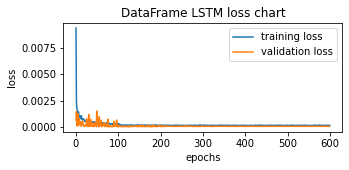

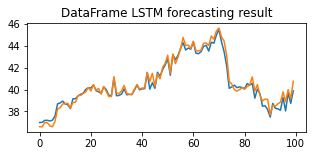

##################################
Model Evaluation with scale of input df
##################################
R2: 0.9675291203423988
RMSE: 0.37637590527604387
MAE: 0.29018223419189487
MAPE: 0.7210736783559525
Running time: 343.245s
Ensemble LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\test_ensemble_ceemdan_log.csv


0
0   36.600960
1   36.588451
2   36.986252
3   36.976196
4   36.669964
..        ...
95  39.787437
96  38.908882
97  39.997475
98  39.169563
99  40.766617

[100 rows x 1 columns]

In [10]:
# VMD IMF0
df_redecom = pd.read_csv(PATH+'ceemdan_rv0_data.csv',header=0,index_col=0)
df_redecom['sum'] = series.values
cl.declare_vars(epochs=1000)
cl.Ensemble_LSTM(df=df_redecom)

In [4]:
# VMD IMF0
cl.declare_vars(mode='ceemdan',form='_rv0',epochs=1000) 
cl.Multi_pred(run_times=10,ensemble_lstm=True)

##################################
LSTM Model Variables
##################################
CELLS:32
DROPOUT:0.2
OPTIMIZER_LOSS:mse
BATCH_SIZE:16
VALIDATION_SPLIT:0.1
VERBOSE:0
SHUFFLE:True
PATIENCE:100
##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
Multiple predictions of CEEMDAN_rv0 is running...
Multiple predictions completed, taking 4478.021s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [5]:
# VMD IMF0,1
cl.declare_vars(mode='ceemdan',form='_rv01',epochs=1000) 
cl.Multi_pred(run_times=10,ensemble_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv01
DATE_BACK:30
PERIODS:100
EPOCHS:1000
Multiple predictions of CEEMDAN_rv01 is running...
Multiple predictions completed, taking 4603.058s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [6]:
# VMD IMF0,1,2
cl.declare_vars(mode='ceemdan',form='_rv012',epochs=1000) 
cl.Multi_pred(run_times=10,ensemble_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv012
DATE_BACK:30
PERIODS:100
EPOCHS:1000
Multiple predictions of CEEMDAN_rv012 is running...
Multiple predictions completed, taking 4722.028s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [8]:
# VMD IMF0,1,2,7
cl.declare_vars(mode='ceemdan',form='_rv0127',epochs=1000) 
cl.Multi_pred(run_times=10,ensemble_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv0127
DATE_BACK:30
PERIODS:100
EPOCHS:1000
Multiple predictions of CEEMDAN_rv0127 is running...
Multiple predictions completed, taking 4603.880s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [10]:
# VMD IMF0,1,2,6,7
cl.declare_vars(mode='ceemdan',form='_rv01267',epochs=1000) 
cl.Multi_pred(run_times=10,ensemble_lstm=True)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv01267
DATE_BACK:30
PERIODS:100
EPOCHS:1000
Multiple predictions of CEEMDAN_rv01267 is running...
Multiple predictions completed, taking 4049.699s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


## 5.4. Validation by other ETS or futures

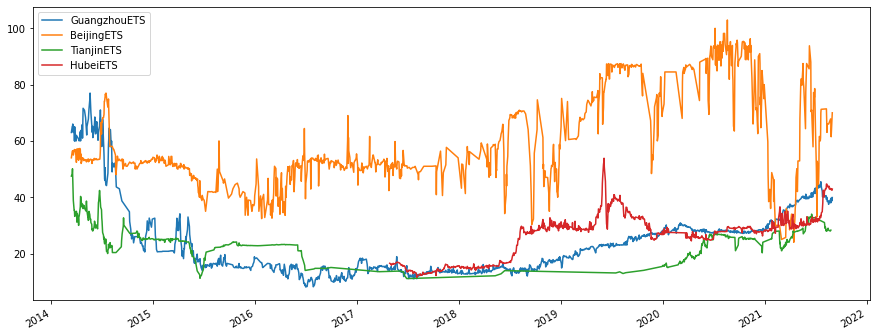

In [44]:
from datetime import datetime

# GuangzhouETS
df_gzETS = pd.read_csv(PATH+'data\\GuangzhouETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_gz = pd.Series(df_gzETS['close'].values,index = df_gzETS['date'])[::-1].astype(float)
# BeijingETS
df_bjETS = pd.read_csv(PATH+'data\\BeijingETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_bj = pd.Series(df_bjETS['close'].values,index = df_bjETS['date'])[::-1].astype(float)
# HubeiETS
df_hbETS = pd.read_csv(PATH+'data\\HubeiETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_hb = pd.Series(df_hbETS['close'].values,index = df_hbETS['date'])[::-1].astype(float)
# TianjinETS
df_tjETS = pd.read_csv(PATH+'data\\TianjinETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_tj = pd.Series(df_tjETS['close'].values,index = df_tjETS['date'])[::-1].astype(float)

fig = plt.figure(figsize=(15,6))
series_gz.plot(label='GuangzhouETS')
series_bj.plot(label='BeijingETS')
series_tj.plot(label='TianjinETS')
series_hb.plot(label='HubeiETS')
plt.xlabel('')
plt.legend()   
plt.savefig(F_PATH+'Original Dataset Figure.svg', bbox_inches='tight')
plt.show()

## Beijing ETS

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Get input pd.Series named: None
CEEMDAN decomposition is running.


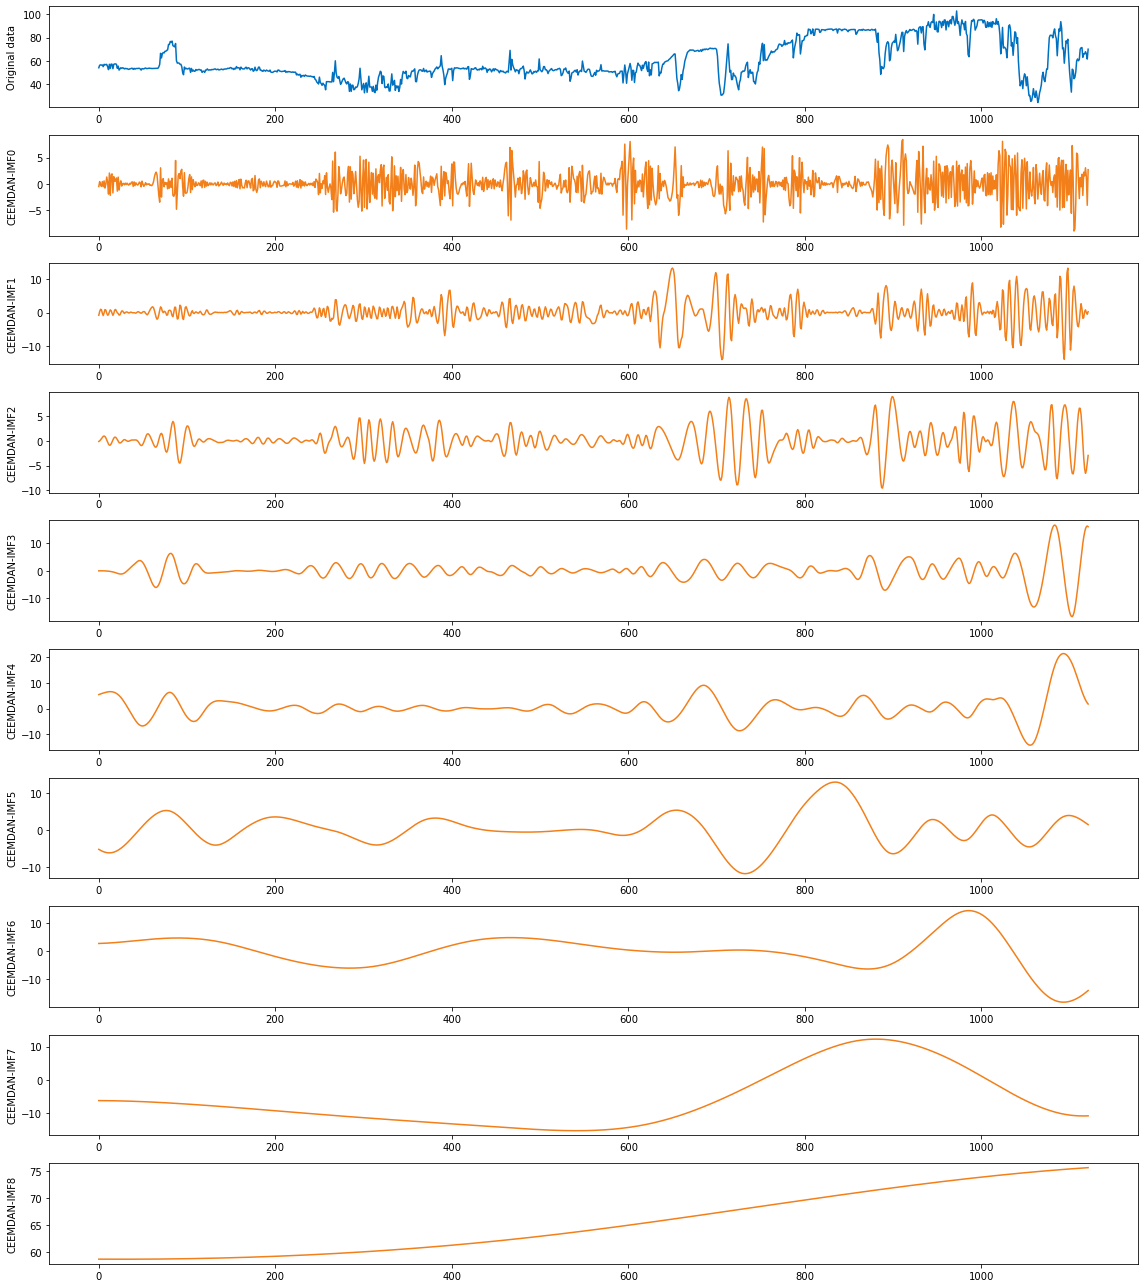

Get input pd.DataFrame.
Sample entropy of a Test is running.


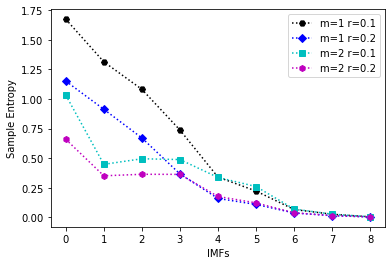

Get input pd.DataFrame.
The Integrating Form: 2223


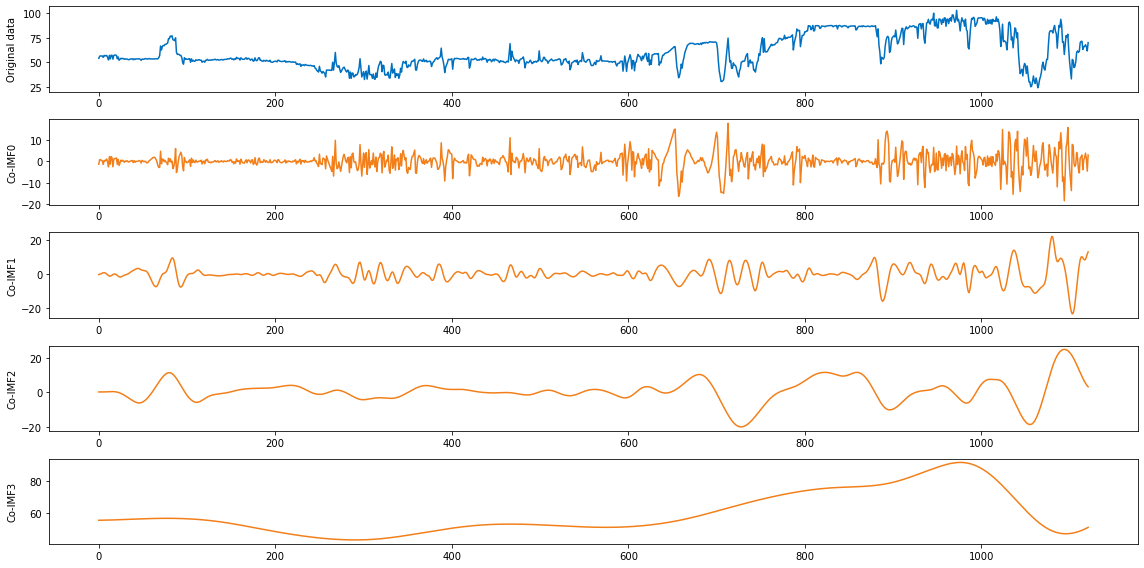

Integration finished, check the dataset:  D:\CEEMDAN_LSTM\test_ceemdan_se2223_data.csv
Get input pd.DataFrame.
Re-decomposition is running for co-imf0.
Get input pd.Series named: co-imf0


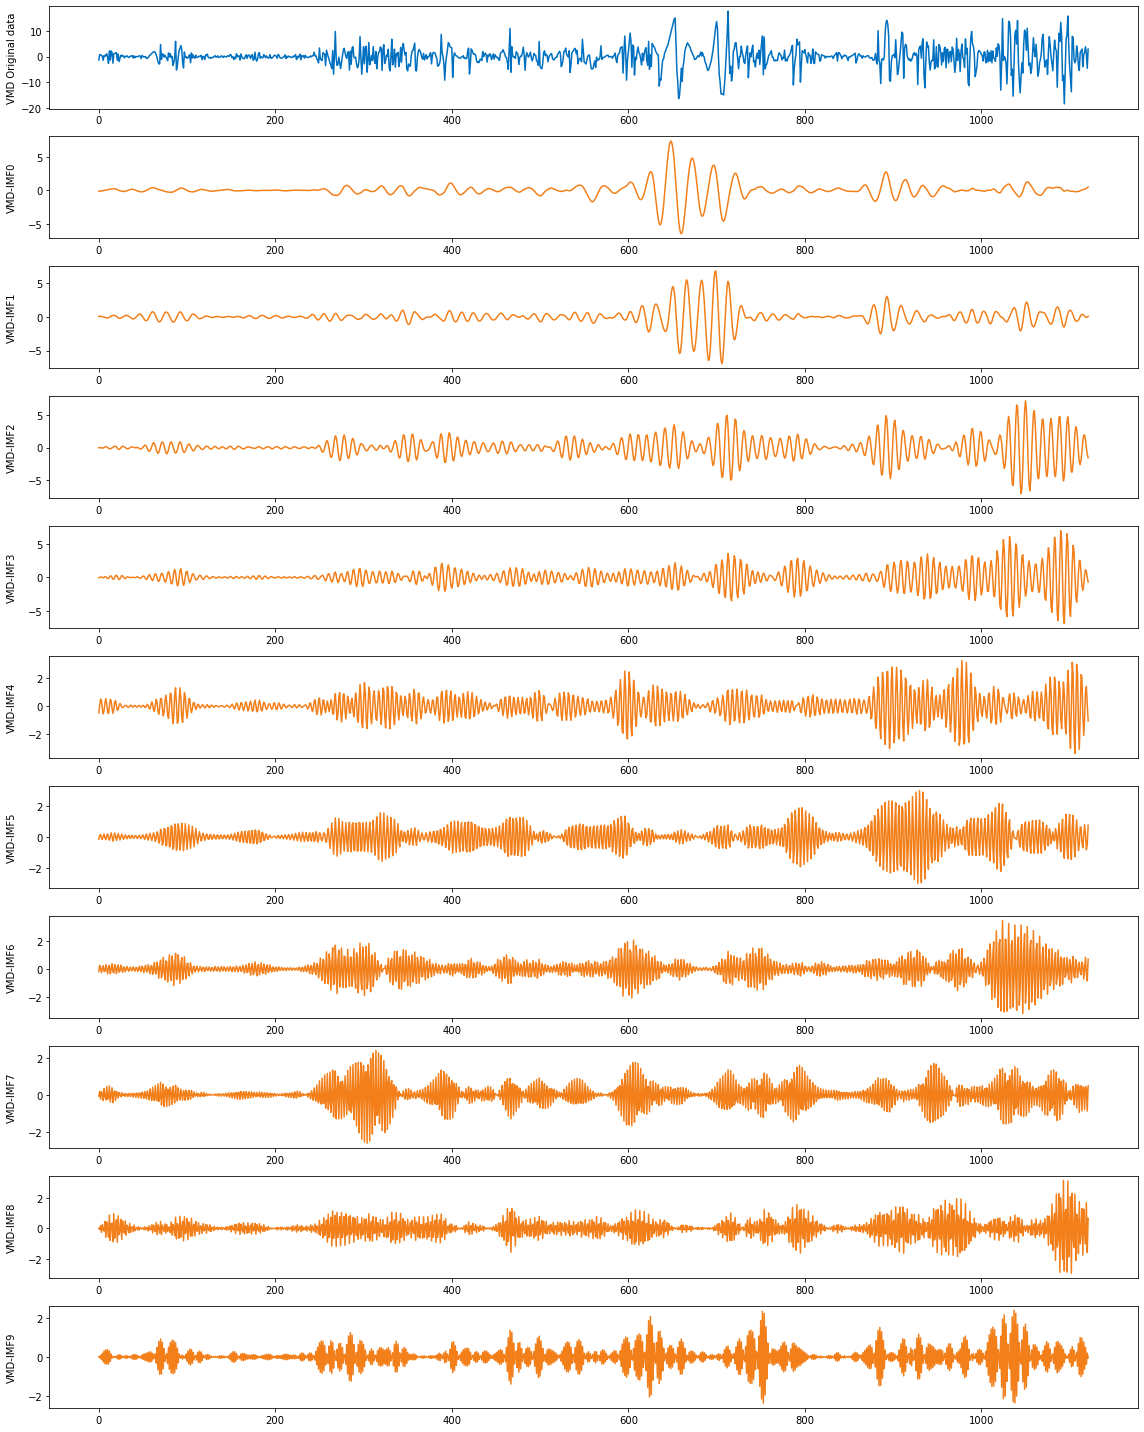

In [4]:
# BeijingETS
df_bjETS = pd.read_csv(PATH+'data\\BeijingETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_bj = pd.Series(df_bjETS['close'].values,index = df_bjETS['date'])[::-1].astype(float)
cl.declare_vars(mode='ceemdan')
ceemdan_bj = cl.emd_decom(series=series_bj)
cl.sample_entropy(imfs_df=ceemdan_bj)
inte_bj = cl.integrate(df=ceemdan_bj,inte_form=[[0,1],[2,3],[4,5],[6,7,8]])
df_vmd_bj = cl.re_decom(df=inte_bj,redecom_mode='vmd',redecom_list=0) 

In [5]:
cl.declare_vars(mode='ceemdan_se',form='2223',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_bj,run_times=10,hybrid_lstm=True,redecom='vmd')

cl.declare_vars(mode='ceemdan_se',form='2223',epochs=1000) # CEEMDAN 
cl.Multi_pred(df=df_vmd_bj,run_times=10,ensemble_lstm=True)

cl.declare_LSTM_MODEL(model='GRU')
cl.declare_vars(mode='ceemdan',form='_gru_se2223',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_bj,run_times=10,hybrid_lstm=True,redecom='vmd',only_res=True)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2223
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE2223 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 9201.962s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [6]:
cl.declare_LSTM_MODEL(model=None)
cl.declare_vars(mode='ceemdan_se',form='2223_ens',epochs=1000) # CEEMDAN 
cl.Multi_pred(df=df_vmd_bj,run_times=9,ensemble_lstm=True)

LSTM_MODEL has changed to be None and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2223_ens
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
Multiple predictions of CEEMDAN_SE2223_ens is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 3564.885s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [7]:
cl.declare_LSTM_MODEL(model='GRU')
cl.declare_vars(mode='ceemdan_se',form='2223_gru',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_bj,run_times=10,hybrid_lstm=True,redecom='vmd')

LSTM_MODEL has changed to be GRU and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:2223_gru
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE2223_gru is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 7524.095s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [32]:
lstm_ens_vmd = pd.read_csv(L_PATH+'lstm_ensemble_ceemdan_se2223_vmd_pred.csv',header=0,index_col=0)
lstm_hyb_vmd = pd.read_csv(L_PATH+'lstm_hybrid_ceemdan_se2223_vmd_pred.csv',header=0,index_col=0)

gru_res_vmd = pd.read_csv(L_PATH+'gru_respective_ceemdan_se2223_vmd_pred.csv',header=0,index_col=0)
gru_hyb_vmd = pd.read_csv(L_PATH+'gru_hybrid_ceemdan_se2223_vmd_pred.csv',header=0,index_col=0)
arr1 = gru_hyb_vmd.values.ravel()
arr2 = lstm_hyb_vmd.values.ravel()
cl.dm_test(series_bj[-100:].values,arr1,arr2)

dm_return(DM=3.8137887219796136, p_value=0.00023814905144745778)

## Hubei ETS

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Get input pd.Series named: None
CEEMDAN decomposition is running.


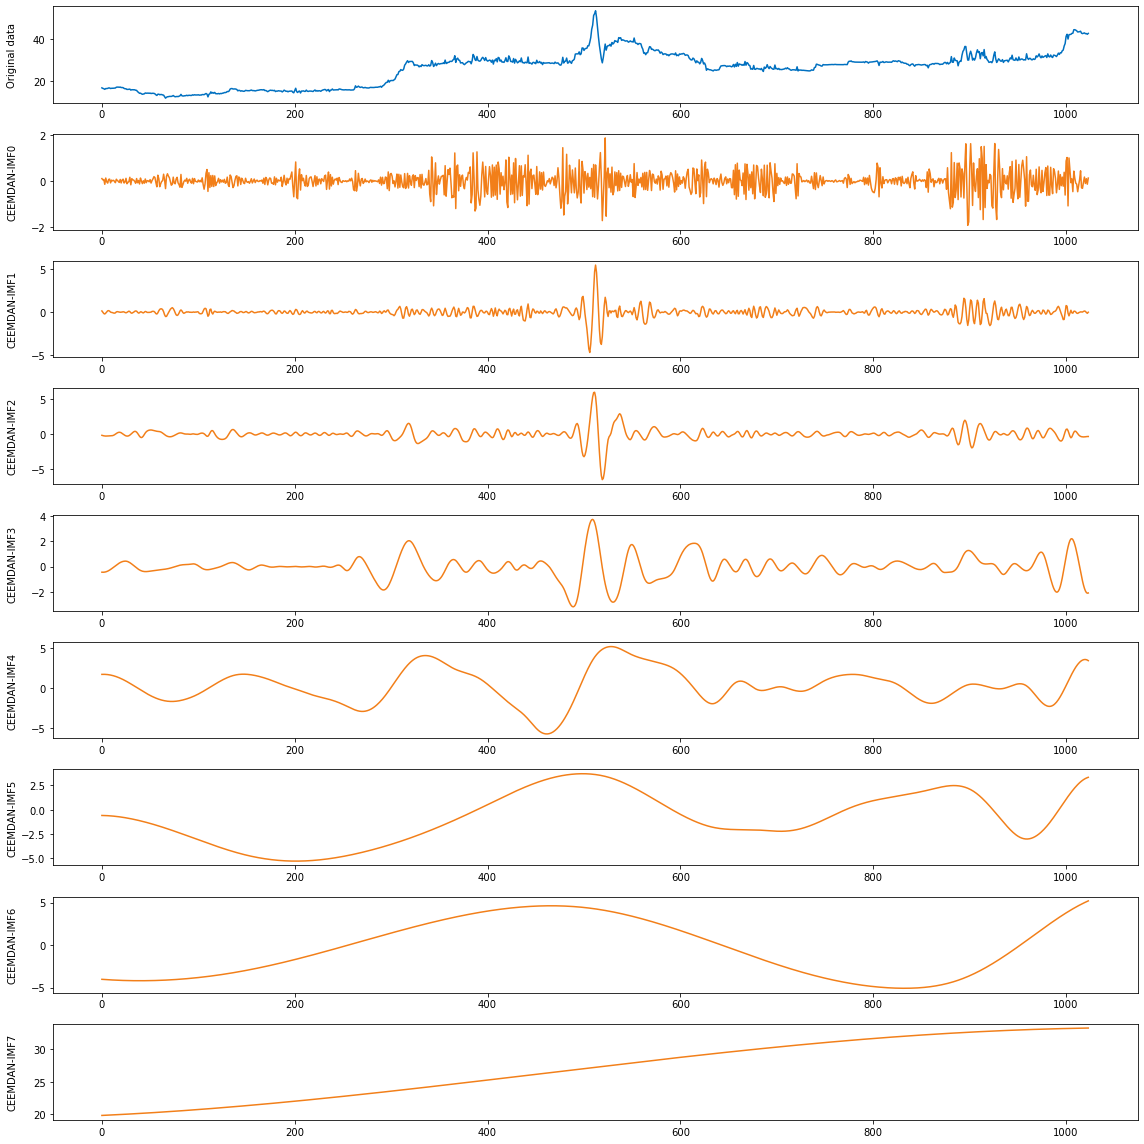

Get input pd.DataFrame.
Sample entropy of a Test is running.


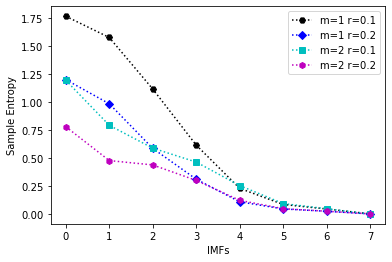

Get input pd.DataFrame.
The Integrating Form: 332


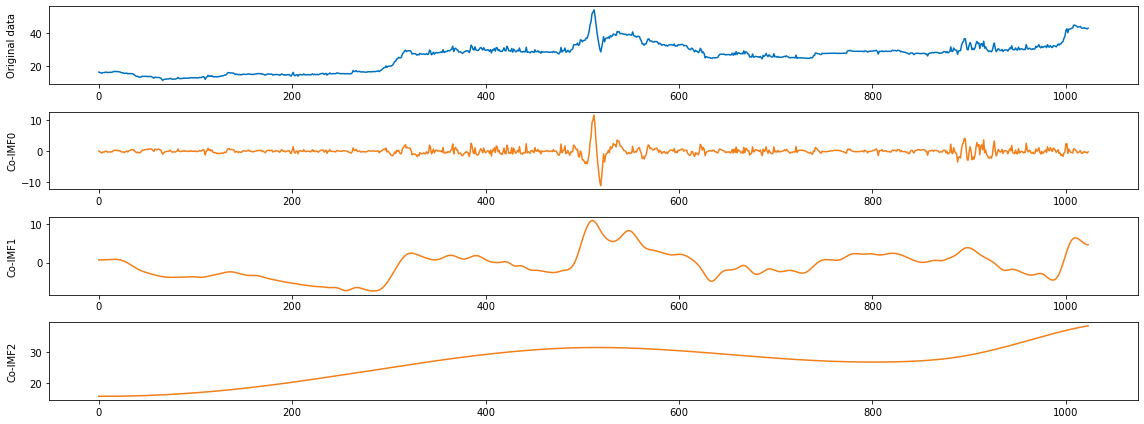

Integration finished, check the dataset:  D:\CEEMDAN_LSTM\test_ceemdan_se332_data.csv
Get input pd.DataFrame.
Re-decomposition is running for co-imf0.
Get input pd.Series named: co-imf0


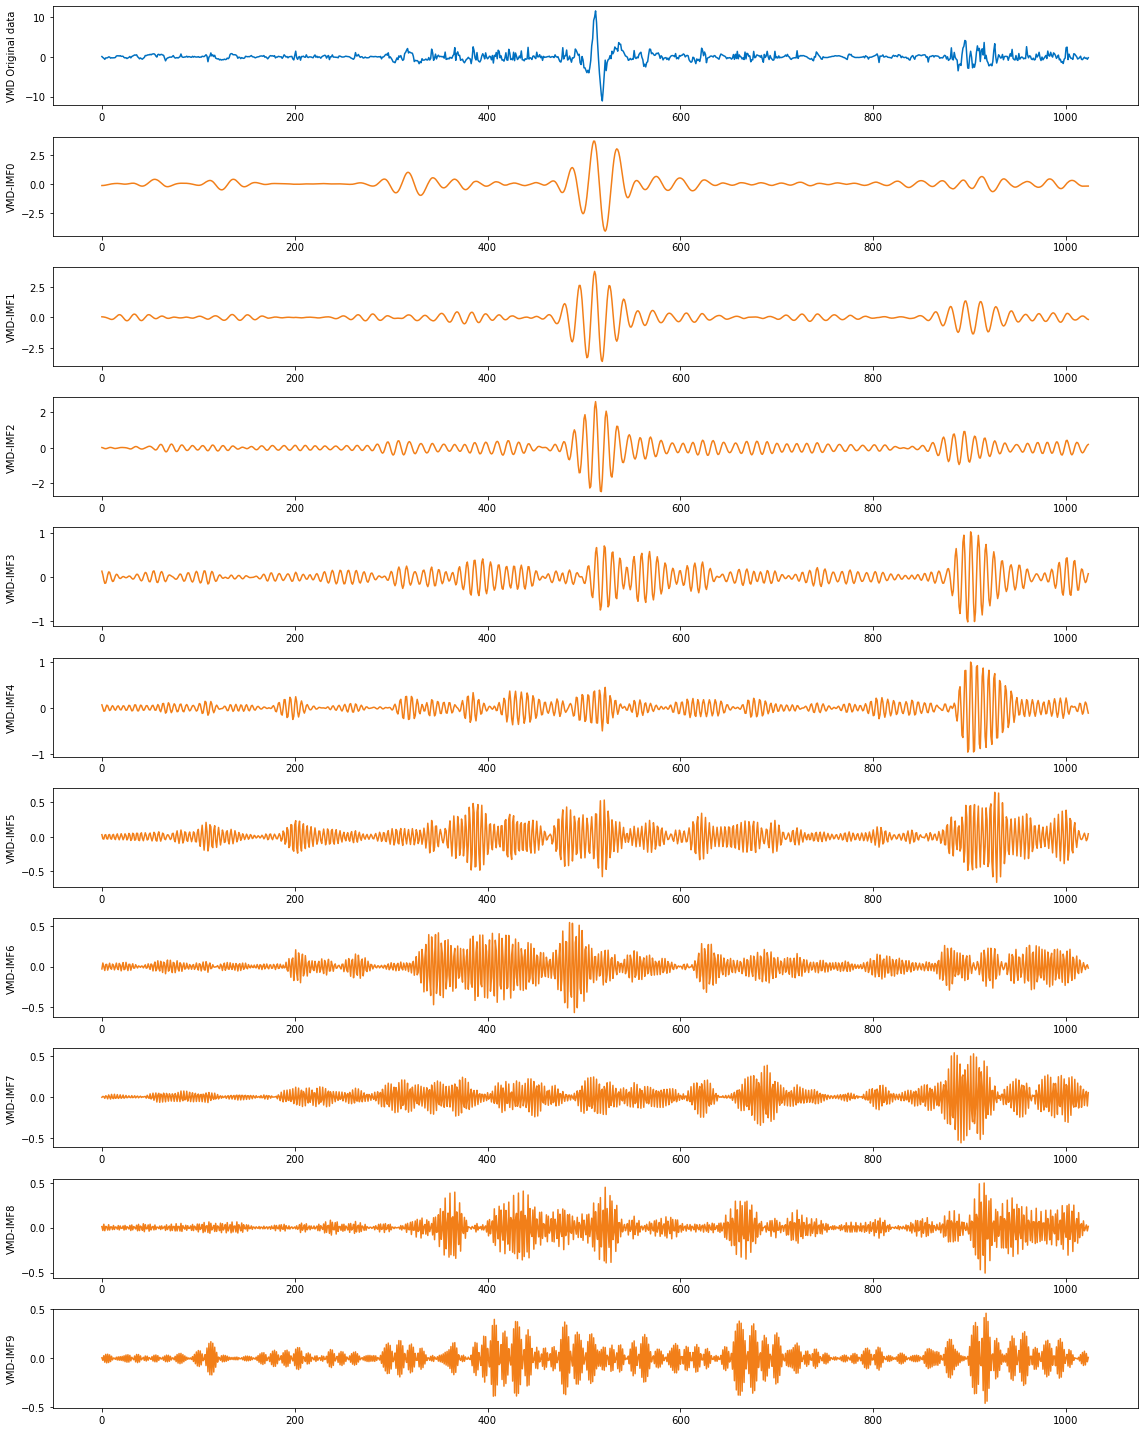

In [8]:
# HubeiETS
df_hbETS = pd.read_csv(PATH+'data\\HubeiETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_hb = pd.Series(df_hbETS['close'].values,index = df_hbETS['date'])[::-1].astype(float)
cl.declare_vars(mode='ceemdan')
ceemdan_hb = cl.emd_decom(series=series_hb)
cl.sample_entropy(imfs_df=ceemdan_hb)
inte_hb = cl.integrate(df=ceemdan_hb,inte_form=[[0,1,2],[3,4,5],[6,7]])
df_vmd_hb = cl.re_decom(df=inte_hb,redecom_mode='vmd',redecom_list=0) 

In [13]:
cl.declare_LSTM_MODEL(model=None)
cl.declare_vars(mode='ceemdan_se',form='332',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_hb,run_times=10,hybrid_lstm=True,redecom='vmd')

cl.declare_vars(mode='ceemdan_se',form='332',epochs=1000) # CEEMDAN 
cl.Multi_pred(df=df_vmd_hb,run_times=10,ensemble_lstm=True)

cl.declare_LSTM_MODEL(model='GRU')
cl.declare_vars(mode='ceemdan_se',form='332_gru',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_hb,run_times=10,hybrid_lstm=True,redecom='vmd')

LSTM_MODEL has changed to be None and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:332
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE332 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 6149.285s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:332
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
Multiple predictions of CEEMDAN_SE332 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 2814.985s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
LSTM_MODEL has changed to be GRU and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:332_gru
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE332_gru is ru

In [35]:
lstm_ens_vmd = pd.read_csv(L_PATH+'lstm_ensemble_ceemdan_se332_vmd_pred.csv',header=0,index_col=0)
lstm_hyb_vmd = pd.read_csv(L_PATH+'lstm_hybrid_ceemdan_se332_vmd_pred.csv',header=0,index_col=0)

gru_res_vmd = pd.read_csv(L_PATH+'gru_respective_ceemdan_se332_vmd_pred.csv',header=0,index_col=0)
gru_hyb_vmd = pd.read_csv(L_PATH+'gru_hybrid_ceemdan_se332_vmd_pred.csv',header=0,index_col=0)
arr1 = gru_res_vmd.values.ravel()
arr2 = lstm_hyb_vmd.values.ravel()
cl.dm_test(series_hb[-100:].values,arr1,arr2)

dm_return(DM=12.494181423140233, p_value=4.553864347188583e-22)

## Tianjin ETS

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Get input pd.Series named: None
CEEMDAN decomposition is running.


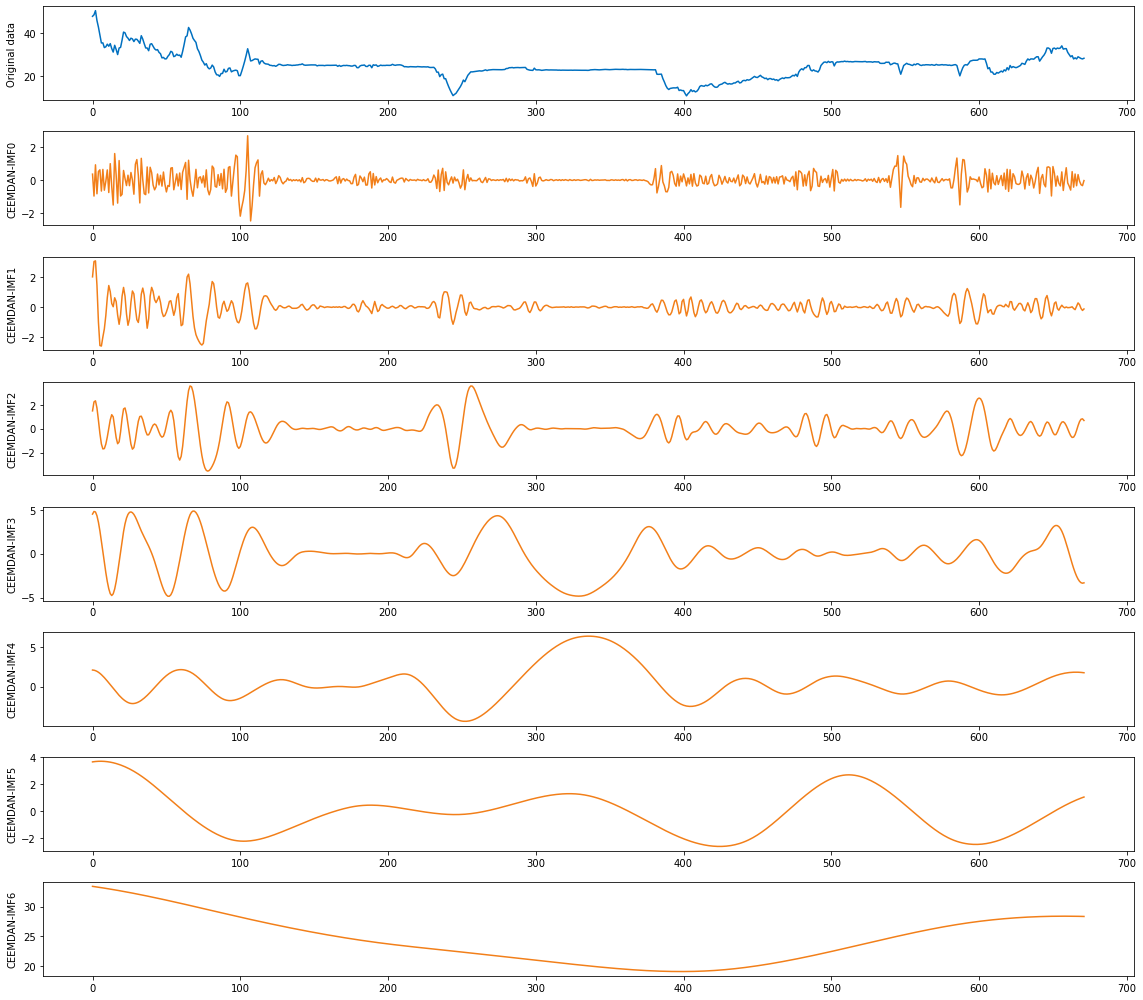

Get input pd.DataFrame.
Sample entropy of a Test is running.


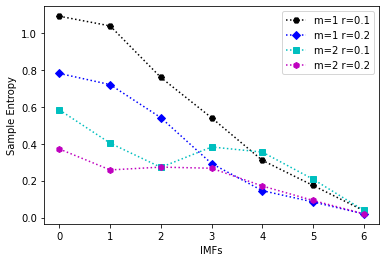

Get input pd.DataFrame.
The Integrating Form: 322


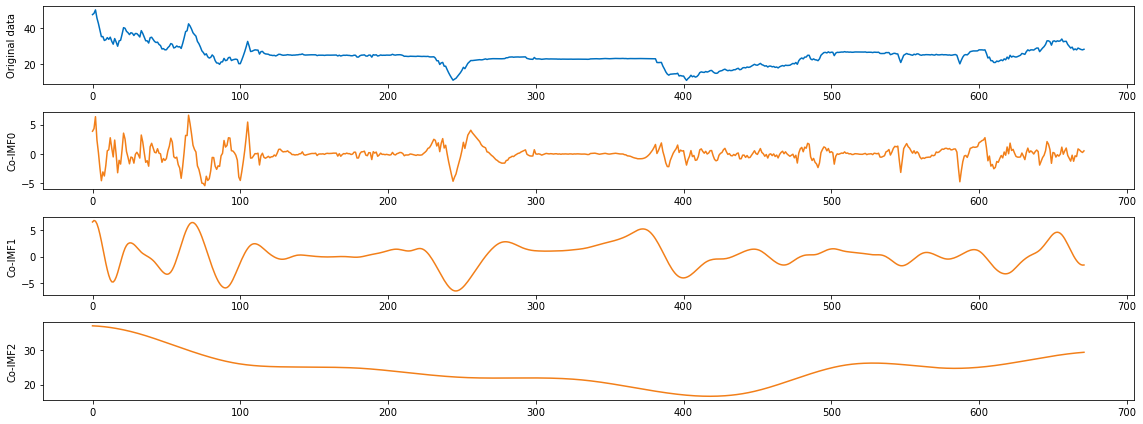

Integration finished, check the dataset:  D:\CEEMDAN_LSTM\test_ceemdan_se322_data.csv
Get input pd.DataFrame.
Re-decomposition is running for co-imf0.
Get input pd.Series named: co-imf0


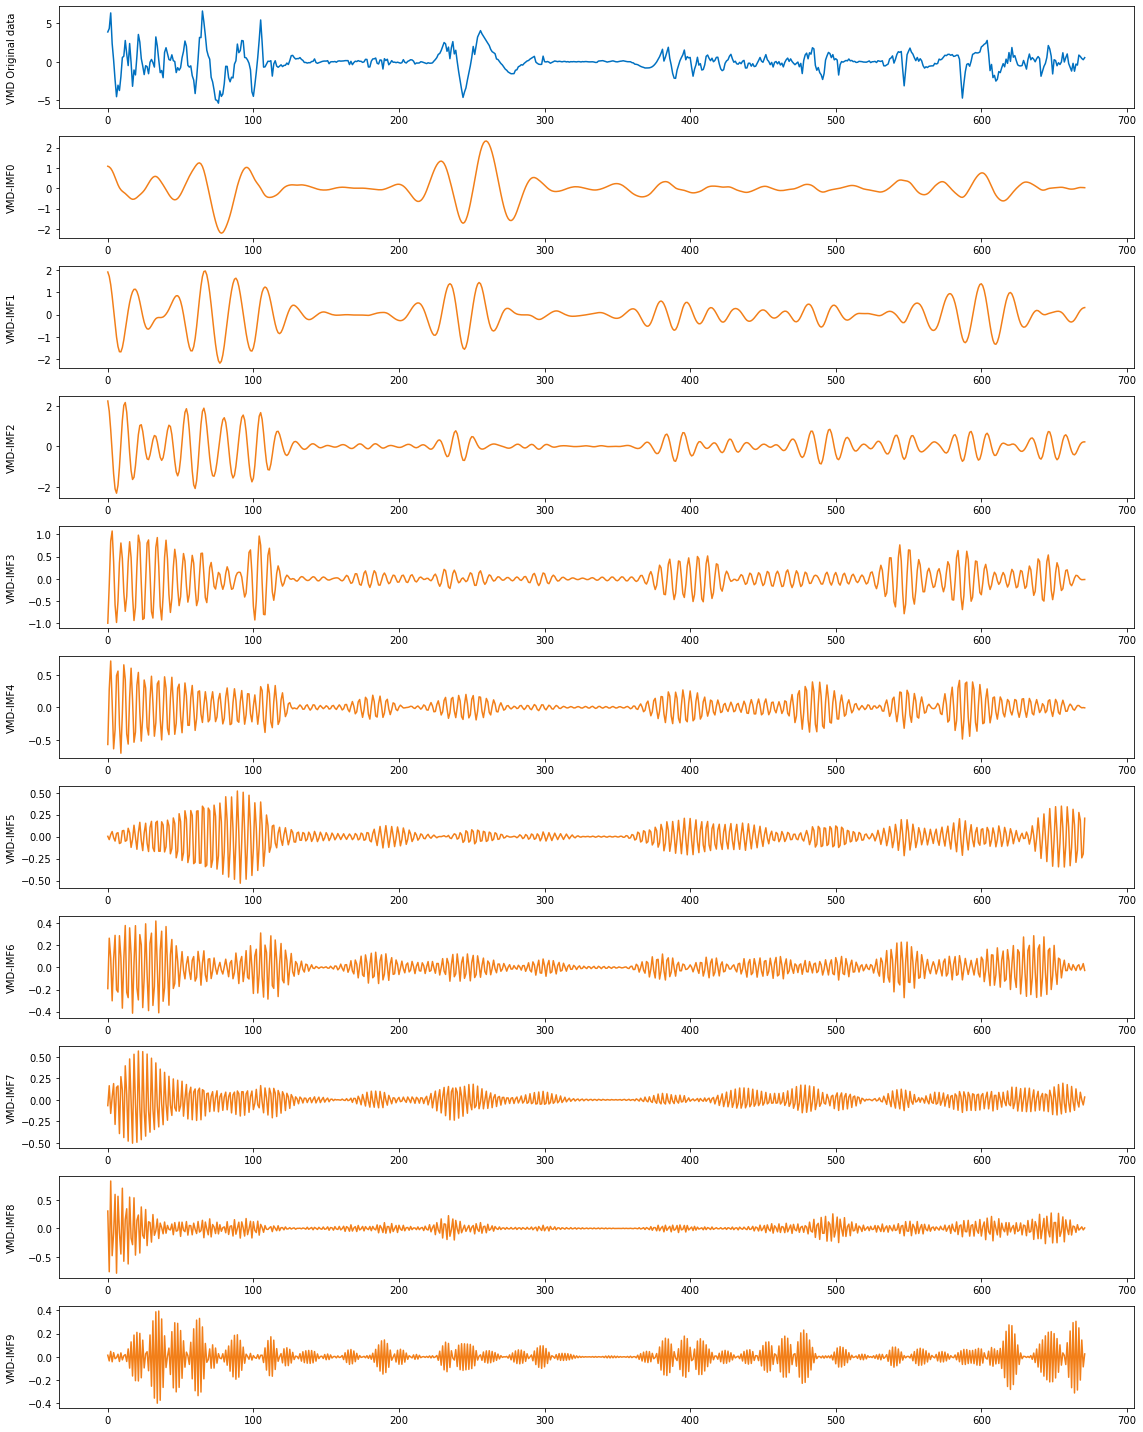

In [14]:
# Tianjin ETS
df_tjETS = pd.read_csv(PATH+'data\\TianjinETS.csv',header=0,parse_dates=["date"], 
                      date_parser=lambda x: datetime.strptime(x, "%Y%m%d"))
series_tj = pd.Series(df_tjETS['close'].values,index = df_tjETS['date'])[::-1].astype(float)
cl.declare_vars(mode='ceemdan')
ceemdan_tj = cl.emd_decom(series=series_tj)
cl.sample_entropy(imfs_df=ceemdan_tj)
inte_tj = cl.integrate(df=ceemdan_tj,inte_form=[[0,1,2],[3,4],[5,6]])
df_vmd_tj = cl.re_decom(df=inte_tj,redecom_mode='vmd',redecom_list=0) 

In [15]:
cl.declare_LSTM_MODEL(model=None)
cl.declare_vars(mode='ceemdan_se',form='322',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_tj,run_times=10,hybrid_lstm=True,redecom='vmd')

cl.declare_vars(mode='ceemdan_se',form='322_ens',epochs=1000) # CEEMDAN 
cl.Multi_pred(df=df_vmd_tj,run_times=10,ensemble_lstm=True)

cl.declare_LSTM_MODEL(model='GRU')
cl.declare_vars(mode='ceemdan_se',form='322_gru',epochs=100) # CEEMDAN 
cl.Multi_pred(df=inte_tj,run_times=10,hybrid_lstm=True,redecom='vmd')

LSTM_MODEL has changed to be None and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:322
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE322 is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 4544.594s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:322_ens
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
Multiple predictions of CEEMDAN_SE322_ens is running...
Get input pd.DataFrame.
Multiple predictions completed, taking 1787.927s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
LSTM_MODEL has changed to be GRU and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:322_gru
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE322_g

In [39]:
lstm_ens_vmd = pd.read_csv(L_PATH+'lstm_ensemble_ceemdan_se322_vmd_pred.csv',header=0,index_col=0)
lstm_hyb_vmd = pd.read_csv(L_PATH+'lstm_hybrid_ceemdan_se322_vmd_pred.csv',header=0,index_col=0)

gru_res_vmd = pd.read_csv(L_PATH+'gru_respective_ceemdan_se322_vmd_pred.csv',header=0,index_col=0)
gru_hyb_vmd = pd.read_csv(L_PATH+'gru_hybrid_ceemdan_se322_vmd_pred.csv',header=0,index_col=0)
arr1 = lstm_ens_vmd.values.ravel()
arr2 = lstm_hyb_vmd.values.ravel()
cl.dm_test(series_tj[-100:].values,arr1,arr2)

dm_return(DM=3.803946785212268, p_value=0.0002465529228650493)

# 6. Other Forecasting Methods

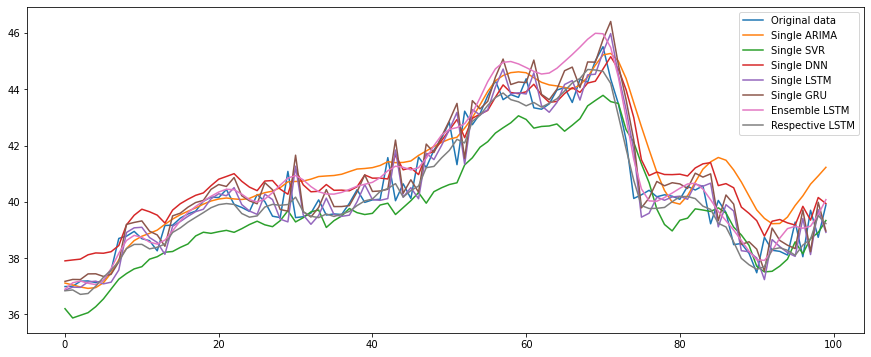

In [47]:
# Plot comparison chart of the above three methods
df_sin = pd.read_csv(L_PATH+'single_pred.csv',header=0,index_col=0)
df_arima = pd.read_csv(L_PATH+'ARIMA_single_pred.csv',header=0,index_col=0)
df_svr = pd.read_csv(L_PATH+'SVR_single_pred.csv',header=0,index_col=0)
df_dnn = pd.read_csv(L_PATH+'DNN_single_pred.csv',header=0,index_col=0)
df_gru = pd.read_csv(L_PATH+'GRU_single_pred.csv',header=0,index_col=0)
df_ens = pd.read_csv(L_PATH+'ensemble_ceemdan_se233_pred.csv',header=0,index_col=0)
df_res = pd.read_csv(L_PATH+'respective_ceemdan_se233_pred.csv',header=0,index_col=0)
df_res = df_res.T.sum().values

# Plot original data by series
PERIODS = 100 # 
length = range(PERIODS)
fig = plt.figure(figsize=(15,6))
plt.plot(length, series[-PERIODS:], label= 'Original data') #color='#0070C0' orange #0070C0 blue
plt.plot(length, df_arima, label= 'Single ARIMA') #color='0.7'
plt.plot(length, df_svr, label= 'Single SVR') #color='0.7'
plt.plot(length, df_dnn, label= 'Single DNN') #color='0.7'
plt.plot(length, df_sin, label= 'Single LSTM') #color='0.7'
plt.plot(length, df_gru, label= 'Single GRU') #color='0.7'
plt.plot(length, df_ens, label= 'Ensemble LSTM') #color='#F27F19'
plt.plot(length, df_res, label= 'Respective LSTM') #color='#C31BA7' pink
plt.xlabel('')
plt.legend()
#plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.savefig(F_PATH+'Comparison of fundamental methodologies and single methods.svg', bbox_inches='tight')
plt.show()

In [42]:
cl.dm_test(series[-PERIODS:].values,df_ens.values.ravel(),df_res)

dm_return(DM=2.860164628612155, p_value=0.0051649533138100065)

LSTM_MODEL has changed to be DNN and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
This is Single LSTM Forecasting running...
Part of Inputting dataset:
date
2014-03-14    63.00
2014-03-17    65.00
2014-03-18    65.00
2014-03-19    66.00
2014-03-20    65.00
              ...  
2021-08-25    39.28
2021-08-26    38.05
2021-08-27    39.70
2021-08-30    38.74
2021-08-31    39.89
Length: 1600, dtype: float64

Input Shape: (30,1)

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 30, 128)           256       
_________________________________________________________________
dropout_225 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
dense_151 (Dens

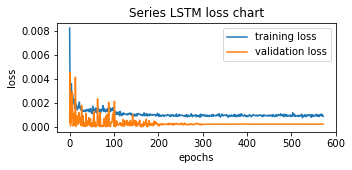

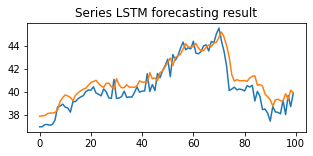

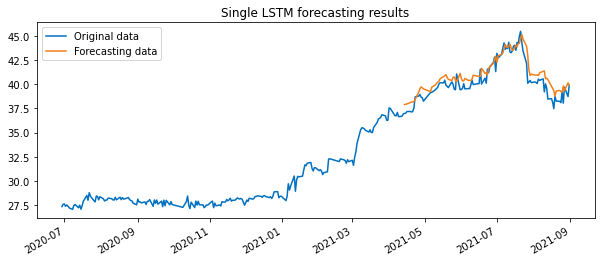

##################################
Model Evaluation with scale of input series
##################################
R2: 0.8007782746825487
RMSE: 0.9322730598990336
MAE: 0.7751071701049805
MAPE: 1.9434540155839315
Running time: 186.748s
Single LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\single_log.csv


In [5]:
# DNN
cl.declare_LSTM_MODEL(model='DNN')
cl.declare_vars(mode='ceemdan_se',form='233',epochs=1000) # CEEMDAN 
cl.Single_LSTM()

LSTM_MODEL has changed to be GRU and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
This is Single LSTM Forecasting running...
Part of Inputting dataset:
date
2014-03-14    63.00
2014-03-17    65.00
2014-03-18    65.00
2014-03-19    66.00
2014-03-20    65.00
              ...  
2021-08-25    39.28
2021-08-26    38.05
2021-08-27    39.70
2021-08-30    38.74
2021-08-31    39.89
Length: 1600, dtype: float64

Input Shape: (30,1)

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_78 (GRU)                 (None, 30, 128)           50304     
_________________________________________________________________
dropout_231 (Dropout)        (None, 30, 128)           0         
_________________________________________________________________
gru_79 (GRU)   

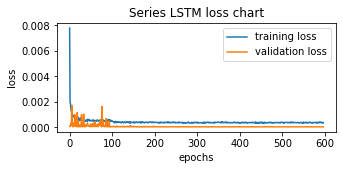

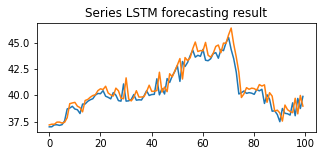

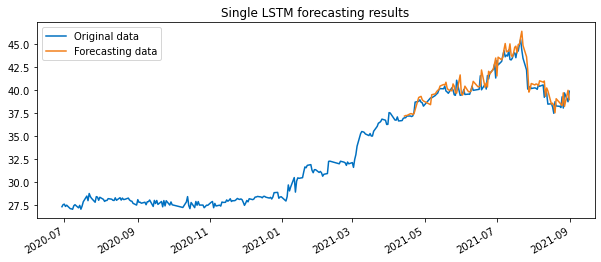

##################################
Model Evaluation with scale of input series
##################################
R2: 0.8345372316142805
RMSE: 0.8496203953397667
MAE: 0.6363578430175783
MAPE: 1.5704591348015062
Running time: 351.977s
Single LSTM Forecasting finished, check the logs D:\CEEMDAN_LSTM\subset\single_log.csv


In [7]:
# GRU
cl.declare_LSTM_MODEL(model='GRU')
cl.declare_vars(mode='ceemdan_se',form='233',epochs=1000) # CEEMDAN 
cl.Single_LSTM()

In [2]:
# DNN
cl.declare_LSTM_MODEL(model='DNN')
cl.declare_vars(mode='ceemdan_se',form='233',epochs=100) # CEEMDAN 
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

LSTM_MODEL has changed to be DNN and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 2550.325s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [3]:
# GRU
cl.declare_LSTM_MODEL(model='GRU')
cl.declare_vars(mode='ceemdan_se',form='233',epochs=100) # CEEMDAN 
cl.Multi_pred(run_times=25,ensemble_lstm=True,respective_lstm=True)

LSTM_MODEL has changed to be GRU and start your forecast.
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 4319.677s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [14]:
dnn_ens_vmd = pd.read_csv(L_PATH+'dnn_ensemble_ceemdan_vmd_pred.csv',header=0,index_col=0)
dnn_res_vmd = pd.read_csv(L_PATH+'dnn_respective_ceemdan_se233_vmd_pred.csv',header=0,index_col=0)
dnn_hyb = pd.read_csv(L_PATH+'dnn_hybrid_ceemdan_se233_pred.csv',header=0,index_col=0)
dnn_hyb_vmd = pd.read_csv(L_PATH+'dnn_hybrid_ceemdan_se233_vmd_pred.csv',header=0,index_col=0)

lstm_ens_vmd = pd.read_csv(L_PATH+'lstm_ensemble_ceemdan_vmd_pred.csv',header=0,index_col=0)
lstm_res_vmd = pd.read_csv(L_PATH+'lstm_respective_ceemdan_se233_vmd_pred.csv',header=0,index_col=0)
lstm_hyb = pd.read_csv(L_PATH+'lstm_hybrid_ceemdan_se233_pred.csv',header=0,index_col=0)
lstm_hyb_vmd = pd.read_csv(L_PATH+'lstm_hybrid_ceemdan_se233_vmd_pred.csv',header=0,index_col=0)

gru_ens_vmd = pd.read_csv(L_PATH+'gru_ensemble_ceemdan_vmd_pred.csv',header=0,index_col=0)
gru_res_vmd = pd.read_csv(L_PATH+'gru_respective_ceemdan_se233_vmd_pred.csv',header=0,index_col=0)
gru_hyb = pd.read_csv(L_PATH+'gru_hybrid_ceemdan_se233_pred.csv',header=0,index_col=0)
gru_hyb_vmd = pd.read_csv(L_PATH+'gru_hybrid_ceemdan_se233_vmd_pred.csv',header=0,index_col=0)

In [26]:
arr1 = gru_hyb_vmd.values.ravel()
arr2 = lstm_hyb_vmd.values.ravel()
cl.dm_test(series[-100:].values,arr1,arr2)

dm_return(DM=8.753592701593611, p_value=5.683458609969628e-14)

# 7. Multiple-step-ahead Forecasting 

Importing...Finished. Use cl.guideline() to call for a guideline or cl.example() for an exmple.
Saving path: D:\CEEMDAN_LSTM\
Load sample dataset: cl_sample_dataset.csv


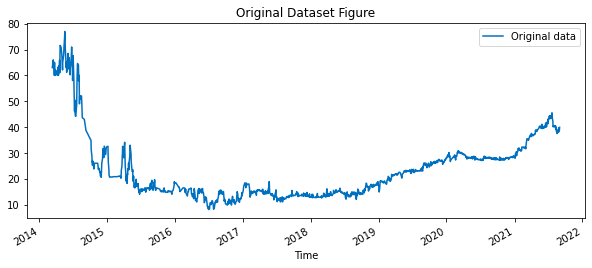

In [1]:
import CEEMDAN_LSTM as cl
series = cl.declare_path() # use default path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
PATH = 'D:\\CEEMDAN_LSTM\\'
F_PATH = 'D:\\CEEMDAN_LSTM\\figures\\'
L_PATH = 'D:\\CEEMDAN_LSTM\\subset\\'
df_233 = pd.read_csv(PATH+'ceemdan_se233_data.csv',header=0,index_col=0)

In [2]:
cl.declare_vars(mode='ceemdan_se',form='233',epochs=100) # CEEMDAN 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd',ahead=2)

##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 12146.676s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [4]:
cl.declare_vars(mode='ceemdan_se',form='233',epochs=100) # CEEMDAN 
cl.Multi_pred(run_times=10,hybrid_lstm=True,redecom='vmd',ahead=3)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_rv0 is running...
Multiple predictions completed, taking 472.015s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
##################################
Global Variables
##################################
MODE:CEEMDAN_SE
FORM:233
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_SE233 is running...
Multiple predictions completed, taking 11986.910s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:100
PATIENCE:10
Multiple predictions of CEEMDAN_rv0 is running...
Multiple predictions completed, taking 573.550s
Please check the logs in: D:\CEEMDAN_LSTM\subset\


In [5]:
cl.declare_vars(mode='ceemdan',form='_se233_rv0',epochs=1000) # CEEMDAN 
cl.Multi_pred(run_times=10,ensemble_lstm=True,ahead=2)
cl.declare_vars(mode='ceemdan',form='_se233_rv0',epochs=1000) # CEEMDAN 
cl.Multi_pred(run_times=10,ensemble_lstm=True,ahead=3)

##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_se233_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
Multiple predictions of CEEMDAN_se233_rv0 is running...
Multiple predictions completed, taking 4630.956s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
##################################
Global Variables
##################################
MODE:CEEMDAN
FORM:_se233_rv0
DATE_BACK:30
PERIODS:100
EPOCHS:1000
PATIENCE:100
Multiple predictions of CEEMDAN_se233_rv0 is running...
Multiple predictions completed, taking 4600.052s
Please check the logs in: D:\CEEMDAN_LSTM\subset\
